<a href="https://colab.research.google.com/github/8893816454/8893816454/blob/main/Multithread_Express_Process%2C_Pool%2C_Queue%2C_Value_Edition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imagine you're managing a busy bus station. Your goal is to efficiently transport passengers from one place to another, minimizing wait times and congestion.

#### Process :   ``` from multiprocessing import Process```

Process: In this analogy, a process is like a separate bus with its own driver. Each bus (process) operates independently, serving its own route without interfering with others. You, as the station manager, oversee multiple buses (processes), coordinating their schedules and ensuring they run smoothly. Each bus can carry passengers and execute tasks (transportation operations) independently.

#### Pool :   ``` from multiprocessing import Pool```
Pool: Now, let's introduce the concept of a pool. Think of a pool as a fleet of buses available at your station. These buses (processes) are ready to be deployed whenever there's a demand for transportation services. As the station manager, you maintain this pool of buses, ensuring they're in good condition and ready to be assigned tasks (passenger pickups).

#### Queue :   ``` from multiprocessing import Queue```
Queue: A queue is like the line of passengers waiting to board the buses at your station. When passengers arrive at the station (tasks to be executed), they join a queue, patiently waiting for the next available bus (process) to pick them up. You manage this queue, ensuring fairness and efficiency in boarding passengers onto the buses (processes).


#### Value :   ``` from multiprocessing import Value```
Value from multiprocessing: In our analogy, the value from multiprocessing could represent the satisfaction of passengers reaching their destinations efficiently. As the station manager, you measure the success of your operation by how quickly and smoothly passengers are transported from one location to another. The value (satisfaction) increases when processes (buses) efficiently execute their tasks (transportation operations), minimizing wait times and congestion at the station.


In [ ]:
import threading
import time
import random

class Passenger:
    def __init__(self, name):
        self.name = name
        self.data = {}

class TicketCollector(Passenger):
    def __init__(self, name):
        super().__init__(name)

    def collect_tickets(self, passenger):
        print(f"{self.name}: Collecting tickets from {passenger.name}...")
        # Simulating data collection
        time.sleep(random.randint(1, 3))
        self.data[passenger.name] = "Ticket Collected"

class TourGuide(Passenger):
    def __init__(self, name):
        super().__init__(name)

    def provide_info(self, passenger):
        print(f"{self.name}: Providing information to {passenger.name}...")
        # Simulating data collection
        time.sleep(random.randint(1, 3))
        self.data[passenger.name] = "Tour Information Provided"

class SafetyInspector(Passenger):
    def __init__(self, name):
        super().__init__(name)

    def inspect_safety(self, passenger):
        print(f"{self.name}: Inspecting safety for {passenger.name}...")
        # Simulating data collection
        time.sleep(random.randint(1, 3))
        self.data[passenger.name] = "Safety Inspection Complete"

class EntertainmentCoordinator(Passenger):
    def __init__(self, name):
        super().__init__(name)

    def entertain_passenger(self, passenger):
        print(f"{self.name}: Entertaining {passenger.name}...")
        # Simulating data collection
        time.sleep(random.randint(1, 3))
        self.data[passenger.name] = "Entertainment Provided"

# Define function representing the bus driver (primary thread)

def bus_driver():
    print("Bus driver: Starting the journey.")
    time.sleep(1)
    print("Bus driver: Driving the bus.")
    time.sleep(1)
    print("Bus driver: Navigating the route.")
    time.sleep(1)
    print("Bus driver: Ensuring passenger safety.")
    time.sleep(1)
    print("Bus driver: Arriving at the destination.")

# Main function representing the bus (process)

def main():
    print("Welcome aboard the bus!")

    # Create passengers
    passengers = [
        TicketCollector("Ticket Collector"),
        TourGuide("Tour Guide"),
        SafetyInspector("Safety Inspector"),
        EntertainmentCoordinator("Entertainment Coordinator")
    ]

    # Start the bus driver thread
    driver_thread = threading.Thread(target=bus_driver)
    driver_thread.start()

    # Start passenger threads
    for passenger in passengers:
        for other_passenger in passengers:
            if passenger != other_passenger:
                method_name = "collect_tickets" if isinstance(passenger, TicketCollector) else "provide_info" if isinstance(passenger, TourGuide) else "inspect_safety" if isinstance(passenger, SafetyInspector) else "entertain_passenger"
                passenger_thread = threading.Thread(target=getattr(passenger, method_name), args=(other_passenger,))
                passenger_thread.start()

    # Wait for all passenger threads to finish
    for passenger in passengers:
        passenger_thread.join()

    # Wait for the bus driver thread to finish
    driver_thread.join()

    # Print collected data
    for passenger in passengers:
        print(f"{passenger.name} Data:", passenger.data)

    print("Thank you for riding with us!")

if __name__ == "__main__":
    main()


Welcome aboard the bus!
Bus driver: Starting the journey.
Ticket Collector: Collecting tickets from Tour Guide...
Ticket Collector: Collecting tickets from Safety Inspector...
Ticket Collector: Collecting tickets from Entertainment Coordinator...
Tour Guide: Providing information to Ticket Collector...
Tour Guide: Providing information to Safety Inspector...
Tour Guide: Providing information to Entertainment Coordinator...
Safety Inspector: Inspecting safety for Ticket Collector...
Safety Inspector: Inspecting safety for Tour Guide...
Safety Inspector: Inspecting safety for Entertainment Coordinator...
Entertainment Coordinator: Entertaining Ticket Collector...
Entertainment Coordinator: Entertaining Tour Guide...
Entertainment Coordinator: Entertaining Safety Inspector...
Bus driver: Driving the bus.
Bus driver: Navigating the route.
Bus driver: Ensuring passenger safety.
Bus driver: Arriving at the destination.
Ticket Collector Data: {'Tour Guide': 'Ticket Collected', 'Safety Inspect

In [ ]:
import os
import time
import threading
import queue

class Bus:
    def __init__(self, name):
        self.name = name
        self.pipe_read, self.pipe_write = os.pipe()
        self.queue = queue.Queue()

    def run(self):
        while True:
            try:
                message = os.read(self.pipe_read, 100).decode()
                if message == "exit":
                    break
                print(f"{self.name}: {message}")
                time.sleep(1)  # Simulating bus operation
            except Exception as e:
                print(f"Error in {self.name}: {e}")

    def dispatch(self, message):
        os.write(self.pipe_write, message.encode())

def bus_stand(bus_queue):
    buses_at_stand = []

    while True:
        if len(buses_at_stand) < 3:
            if not bus_queue.empty():
                bus = bus_queue.get()
                buses_at_stand.append(bus)
                print(f"Bus Stand: Bus {bus.name} entered the stand.")
                thread = threading.Thread(target=bus.run)
                thread.start()
                time.sleep(1)  # Simulating bus entering stand
            else:
                time.sleep(1)  # Wait for buses to arrive
        else:
            for bus in buses_at_stand:
                bus.dispatch("Leave the stand.")
                print(f"Bus Stand: Bus {bus.name} left the stand.")
                bus_queue.put(bus)
            buses_at_stand.clear()

def main():
    bus_queue = queue.Queue()
    stand_thread = threading.Thread(target=bus_stand, args=(bus_queue,))
    stand_thread.start()

    for i in range(1, 7):
        bus = Bus(f"Bus{i}")
        bus_queue.put(bus)

    stand_thread.join()

if __name__ == "__main__":
    main()


Bus Stand: Bus Bus1 entered the stand.
Bus Stand: Bus Bus2 entered the stand.
Bus Stand: Bus Bus3 entered the stand.
Bus Stand: Bus Bus1 left the stand.Bus1: Leave the stand.

Bus Stand: Bus Bus2 left the stand.
Bus2: Leave the stand.
Bus Stand: Bus Bus3 left the stand.
Bus Stand: Bus Bus4 entered the stand.Bus3: Leave the stand.

Bus Stand: Bus Bus5 entered the stand.
Bus Stand: Bus Bus6 entered the stand.
Bus Stand: Bus Bus4 left the stand.Bus4: Leave the stand.

Bus Stand: Bus Bus5 left the stand.
Bus5: Leave the stand.
Bus Stand: Bus Bus6 left the stand.
Bus Stand: Bus Bus1 entered the stand.
Bus6: Leave the stand.
Bus Stand: Bus Bus2 entered the stand.
Bus Stand: Bus Bus3 entered the stand.
Bus Stand: Bus Bus1 left the stand.Bus1: Leave the stand.

Bus2: Leave the stand.
Bus Stand: Bus Bus2 left the stand.
Bus3: Leave the stand.
Bus Stand: Bus Bus3 left the stand.
Bus Stand: Bus Bus4 entered the stand.
Bus Stand: Bus Bus5 entered the stand.
Bus Stand: Bus Bus6 entered the stand.
B

KeyboardInterrupt: 

In [ ]:
import os
import time
import threading
import queue

class Bus:
    def __init__(self, name, bus_type):
        self.name = name
        self.bus_type = bus_type
        self.pipe_read, self.pipe_write = os.pipe()
        self.queue = queue.Queue()

    def run(self):
        while True:
            try:
                message = os.read(self.pipe_read, 100).decode()
                if message == "exit":
                    break
                print(f"{self.name}: {message}")
                time.sleep(1)  # Simulating bus operation
            except Exception as e:
                print(f"Error in {self.name}: {e}")

    def dispatch(self, message):
        os.write(self.pipe_write, message.encode())

def bus_stand(bus_queue):
    buses_at_stand = []

    while True:
        if len(buses_at_stand) < 3:
            if not bus_queue.empty():
                bus = bus_queue.get()
                buses_at_stand.append(bus)
                print(f"Bus Stand: Bus {bus.name} entered the stand.")
                thread = threading.Thread(target=bus.run)
                thread.start()
                time.sleep(1)  # Simulating bus entering stand
            else:
                time.sleep(1)  # Wait for buses to arrive
        else:
            for bus in buses_at_stand:
                bus.dispatch("Leave the stand.")
                print(f"Bus Stand: Bus {bus.name} left the stand.")
                bus_queue.put(bus)
            buses_at_stand.clear()

def main():
    bus_queue = queue.Queue()
    stand_thread = threading.Thread(target=bus_stand, args=(bus_queue,))
    stand_thread.start()

    # Adding buses of different types
    for i in range(1, 6):
        if i == 1:
            bus = Bus(f"LineBus{i}", "line")
        else:
            bus = Bus(f"SuperDeluxBus{i}", "superDelux")
        bus_queue.put(bus)

    stand_thread.join()

if __name__ == "__main__":
    main()


Bus Stand: Bus Bus3 entered the stand.
Bus Stand: Bus LineBus1 entered the stand.
Bus Stand: Bus Bus1 left the stand.Bus1: Leave the stand.
Bus Stand: Bus Bus2 left the stand.
Bus2: Leave the stand.Bus Stand: Bus Bus3 left the stand.
Bus Stand: Bus Bus4 entered the stand.


Bus3: Leave the stand.
Bus Stand: Bus SuperDeluxBus2 entered the stand.
Bus Stand: Bus Bus5 entered the stand.
Bus Stand: Bus SuperDeluxBus3 entered the stand.
Bus Stand: Bus Bus6 entered the stand.
Bus Stand: Bus LineBus1 left the stand.LineBus1: Leave the stand.

Bus Stand: Bus SuperDeluxBus2 left the stand.SuperDeluxBus2: Leave the stand.

SuperDeluxBus3: Leave the stand.
Bus Stand: Bus SuperDeluxBus3 left the stand.
Bus Stand: Bus SuperDeluxBus4 entered the stand.
Bus Stand: Bus Bus4 left the stand.Bus4: Leave the stand.

Bus5: Leave the stand.
Bus Stand: Bus Bus5 left the stand.
Bus6: Leave the stand.Bus Stand: Bus Bus6 left the stand.
Bus Stand: Bus Bus1 entered the stand.

Bus Stand: Bus SuperDeluxBus5 entere

KeyboardInterrupt: 

In [ ]:
def bus_stand(bus_queue):
    buses_at_stand = []

    while True:
        if len(buses_at_stand) < 3:
            if not bus_queue.empty():
                bus = bus_queue.get()
                buses_at_stand.append(bus)
                print(f"Bus Stand: Bus {bus.name} entered the stand.")
                thread = threading.Thread(target=bus.run)
                thread.start()
                time.sleep(1)  # Simulating bus entering stand
            else:
                time.sleep(1)  # Wait for buses to arrive
        else:
            # Check if there's a superDelux bus and a line bus in the stand
            super_delux_bus = None
            line_bus = None
            for bus in buses_at_stand:
                if bus.bus_type == "superDelux":
                    super_delux_bus = bus
                elif bus.bus_type == "line":
                    line_bus = bus

            # If both types of buses are present, allow overtaking
            if super_delux_bus and line_bus:
                print(f"Bus Stand: SuperDeluxBus {super_delux_bus.name} overtakes LineBus {line_bus.name}.")
                super_delux_bus.dispatch("Leave the stand.")
                line_bus.dispatch("Leave the stand.")
                buses_at_stand.remove(super_delux_bus)
                buses_at_stand.remove(line_bus)
                time.sleep(1)  # Simulating overtaking
                bus_queue.put(super_delux_bus)
                bus_queue.put(line_bus)
            else:
                for bus in buses_at_stand:
                    bus.dispatch("Leave the stand.")
                    print(f"Bus Stand: Bus {bus.name} left the stand.")
                    bus_queue.put(bus)
                buses_at_stand.clear()


Bus Stand: Bus Bus2 entered the stand.
Bus Stand: Bus LineBus1 entered the stand.


In [ ]:
import threading
import time
import queue

class Bus:
    def __init__(self, name):
        self.name = name
        self.passengers = []

    def pick_passengers(self, passenger_queue):
        while not passenger_queue.empty():
            passenger = passenger_queue.get()
            self.passengers.append(passenger)
            print(f"{self.name}: Picked up passenger {passenger}")

            # Simulate some processing time before next pick-up
            time.sleep(1)

class Passenger:
    def __init__(self, name):
        self.name = name

def queue_manager(passenger_queue, buses):
    while True:
        # Check if there are passengers in the queue
        if not passenger_queue.empty():
            # Dispatch buses to pick up passengers
            for bus in buses:
                if threading.active_count() <= 5:  # Limit threads to avoid too many pickups at once
                    threading.Thread(target=bus.pick_passengers, args=(passenger_queue,), daemon=True).start()

            # Simulate some time before next check
            time.sleep(3)
        else:
            print("No passengers in queue. Waiting...")
            time.sleep(2)

def main():
    passenger_queue = queue.Queue()
    buses = [Bus(f"Bus {i}") for i in range(1, 4)]

    # Create passengers and add them to the queue
    for i in range(1, 11):
        passenger = Passenger(f"Passenger {i}")
        passenger_queue.put(passenger)
        print(f"{passenger.name} joins the queue.")

    # Start queue manager
    threading.Thread(target=queue_manager, args=(passenger_queue, buses), daemon=True).start()

    # Wait for all buses to finish picking up passengers
    time.sleep(20)

    # Print passengers picked up by each bus
    for bus in buses:
        print(f"{bus.name} picked up passengers:", [passenger.name for passenger in bus.passengers])

if __name__ == "__main__":
    main()


Passenger 1 joins the queue.
Passenger 2 joins the queue.
Passenger 3 joins the queue.
Passenger 4 joins the queue.
Passenger 5 joins the queue.
Passenger 6 joins the queue.
Passenger 7 joins the queue.
Passenger 8 joins the queue.
Passenger 9 joins the queue.
Passenger 10 joins the queue.
Bus Stand: Bus SuperDeluxBus4 entered the stand.
Bus Stand: Bus Bus2 entered the stand.
Bus Stand: Bus SuperDeluxBus5 entered the stand.
Bus Stand: Bus Bus3 entered the stand.
Bus Stand: Bus SuperDeluxBus3 left the stand.SuperDeluxBus3: Leave the stand.
Bus Stand: Bus SuperDeluxBus4 left the stand.
SuperDeluxBus4: Leave the stand.
Bus Stand: Bus SuperDeluxBus5 left the stand.
Bus Stand: Bus LineBus1 entered the stand.
SuperDeluxBus5: Leave the stand.

Bus Stand: Bus Bus1 left the stand.Bus1: Leave the stand.
Bus Stand: Bus Bus2 left the stand.
Bus Stand: Bus Bus3 left the stand.
Bus Stand: Bus Bus4 entered the stand.
Bus3: Leave the stand.

Bus2: Leave the stand.
Bus Stand: Bus SuperDeluxBus2 entered

KeyboardInterrupt: 

In [ ]:
import threading
import time
import queue
from multiprocessing import Value

class Bus:
    def __init__(self, name, satisfaction):
        self.name = name
        self.passengers = []
        self.satisfaction = satisfaction

    def pick_passengers(self, passenger_queue):
        while not passenger_queue.empty():
            passenger = passenger_queue.get()
            self.passengers.append(passenger)
            print(f"{self.name}: Picked up passenger {passenger}")

            # Increment satisfaction level
            with self.satisfaction.get_lock():
                self.satisfaction.value += 1

            # Simulate some processing time before next pick-up
            time.sleep(1)

class Passenger:
    def __init__(self, name):
        self.name = name

def queue_manager(passenger_queue, buses):
    while True:
        # Check if there are passengers in the queue
        if not passenger_queue.empty():
            # Dispatch buses to pick up passengers
            for bus in buses:
                if threading.active_count() <= 5:  # Limit threads to avoid too many pickups at once
                    threading.Thread(target=bus.pick_passengers, args=(passenger_queue,), daemon=True).start()

            # Simulate some time before next check
            time.sleep(3)
        else:
            print("No passengers in queue. Waiting...")
            time.sleep(2)

def main():
    passenger_queue = queue.Queue()
    buses = [Bus(f"Bus {i}", Value('i', 0)) for i in range(1, 4)]

    # Create passengers and add them to the queue
    for i in range(1, 11):
        passenger = Passenger(f"Passenger {i}")
        passenger_queue.put(passenger)
        print(f"{passenger.name} joins the queue.")

    # Start queue manager
    threading.Thread(target=queue_manager, args=(passenger_queue, buses), daemon=True).start()

    # Wait for all buses to finish picking up passengers
    time.sleep(20)

    # Print passengers picked up by each bus
    for bus in buses:
        print(f"{bus.name} picked up passengers:", [passenger.name for passenger in bus.passengers])

    # Print satisfaction level
    total_satisfaction = sum([bus.satisfaction.value for bus in buses])
    print(f"Total satisfaction level: {total_satisfaction}")

if __name__ == "__main__":
    main()


Bus Stand: Bus Bus1 left the stand.
Bus Stand: Bus Bus2 left the stand.
Bus Stand: Bus Bus3 left the stand.
Bus Stand: Bus Bus4 entered the stand.
Bus1: Leave the stand.
Bus3: Leave the stand.
Bus2: Leave the stand.
Passenger 1 joins the queue.
Passenger 2 joins the queue.
Passenger 3 joins the queue.
Passenger 4 joins the queue.
Passenger 5 joins the queue.
Passenger 6 joins the queue.
Passenger 7 joins the queue.
Passenger 8 joins the queue.
Passenger 9 joins the queue.
Passenger 10 joins the queue.
Bus Stand: Bus SuperDeluxBus2 entered the stand.
Bus Stand: Bus Bus5 entered the stand.
Bus Stand: Bus SuperDeluxBus3 entered the stand.
Bus Stand: Bus Bus6 entered the stand.
Bus Stand: Bus LineBus1 left the stand.LineBus1: Leave the stand.

Bus Stand: Bus SuperDeluxBus2 left the stand.
Bus Stand: Bus SuperDeluxBus3 left the stand.
Bus Stand: Bus SuperDeluxBus4 entered the stand.
SuperDeluxBus2: Leave the stand.
SuperDeluxBus3: Leave the stand.
Bus Stand: Bus Bus4 left the stand.Bus4: Le

KeyboardInterrupt: 

In [ ]:
import threading
import time
import queue
from multiprocessing import Value

class Bus:
    def __init__(self, name, satisfaction):
        self.name = name
        self.passengers = []
        self.satisfaction = satisfaction

    def pick_passengers(self, passenger_queue):
        while not passenger_queue.empty():
            passenger = passenger_queue.get()
            self.passengers.append(passenger)
            print(f"{self.name}: Picked up passenger {passenger}")

            # Increment satisfaction level
            with self.satisfaction.get_lock():
                self.satisfaction.value += 1

            # Simulate some processing time before next pick-up
            time.sleep(1)

class Passenger:
    def __init__(self, name):
        self.name = name

def queue_manager(passenger_queue, buses):
    while True:
        # Check if there are passengers in the queue
        if not passenger_queue.empty():
            # Dispatch buses to pick up passengers
            for bus in buses:
                if threading.active_count() <= 5:  # Limit threads to avoid too many pickups at once
                    threading.Thread(target=bus.pick_passengers, args=(passenger_queue,), daemon=True).start()

            # Simulate some time before next check
            time.sleep(3)
        else:
            print("No passengers in queue. Waiting...")
            time.sleep(2)

def main():
    passenger_queue = queue.Queue()
    buses = [Bus(f"Bus {i}", Value('i', 0)) for i in range(1, 4)]

    # Create passengers and add them to the queue
    for i in range(1, 11):
        passenger = Passenger(f"Passenger {i}")
        passenger_queue.put(passenger)
        print(f"{passenger.name} joins the queue.")

    # Start queue manager
    threading.Thread(target=queue_manager, args=(passenger_queue, buses), daemon=True).start()

    # Wait for all buses to finish picking up passengers
    time.sleep(20)

    # Print passengers picked up by each bus
    for bus in buses:
        print(f"{bus.name} picked up passengers:", [passenger.name for passenger in bus.passengers])

    # Print satisfaction level
    total_satisfaction = sum([bus.satisfaction.value for bus in buses])
    print(f"Total satisfaction level: {total_satisfaction}")

if __name__ == "__main__":
    main()


Passenger 1 joins the queue.
Passenger 2 joins the queue.
Passenger 3 joins the queue.
Passenger 4 joins the queue.
Passenger 5 joins the queue.
Passenger 6 joins the queue.
Passenger 7 joins the queue.
Passenger 8 joins the queue.
Passenger 9 joins the queue.
Passenger 10 joins the queue.
Bus Stand: Bus Bus5 entered the stand.
Bus Stand: Bus SuperDeluxBus5 entered the stand.
Bus Stand: Bus Bus6 entered the stand.
Bus Stand: Bus SuperDeluxBus3 left the stand.SuperDeluxBus3: Leave the stand.

Bus Stand: Bus SuperDeluxBus4 left the stand.SuperDeluxBus4: Leave the stand.

SuperDeluxBus5: Leave the stand.
Bus Stand: Bus SuperDeluxBus5 left the stand.
Bus Stand: Bus LineBus1 entered the stand.
Bus Stand: Bus Bus4 left the stand.Bus4: Leave the stand.

Bus5: Leave the stand.
Bus Stand: Bus Bus5 left the stand.
Bus Stand: Bus Bus6 left the stand.Bus6: Leave the stand.
Bus Stand: Bus Bus1 entered the stand.

Bus Stand: Bus SuperDeluxBus2 entered the stand.
Bus Stand: Bus Bus2 entered the stand

##### We can use various inter-process communication (IPC) mechanisms to simulate communication between bus stands or any other entities in your simulation. One such mechanism is the multiprocessing.Queue class, which allows communication between different processes.*italicized text*

In [ ]:
import threading
import time
import queue
from multiprocessing import Value, Queue

class Bus:
    def __init__(self, name, satisfaction, message_queue):
        self.name = name
        self.passengers = []
        self.satisfaction = satisfaction
        self.message_queue = message_queue

    def pick_passengers(self, passenger_queue):
        while not passenger_queue.empty():
            passenger = passenger_queue.get()
            self.passengers.append(passenger)
            print(f"{self.name}: Picked up passenger {passenger}")

            # Increment satisfaction level
            with self.satisfaction.get_lock():
                self.satisfaction.value += 1

            # Send status message to other bus stands
            self.message_queue.put(f"{self.name} has picked up passengers")

            # Simulate some processing time before next pick-up
            time.sleep(1)

class Passenger:
    def __init__(self, name):
        self.name = name

def queue_manager(passenger_queue, buses, message_queue):
    while True:
        # Check if there are passengers in the queue
        if not passenger_queue.empty():
            # Dispatch buses to pick up passengers
            for bus in buses:
                if threading.active_count() <= 5:  # Limit threads to avoid too many pickups at once
                    threading.Thread(target=bus.pick_passengers, args=(passenger_queue,), daemon=True).start()

            # Simulate some time before next check
            time.sleep(3)
        else:
            print("No passengers in queue. Waiting...")
            time.sleep(2)

            # Check for status messages from other bus stands
            if not message_queue.empty():
                status_message = message_queue.get()
                print(f"Received status: {status_message}")

def main():
    passenger_queue = queue.Queue()
    message_queue = Queue()
    buses = [Bus(f"Bus {i}", Value('i', 0), message_queue) for i in range(1, 4)]

    # Create passengers and add them to the queue
    for i in range(1, 11):
        passenger = Passenger(f"Passenger {i}")
        passenger_queue.put(passenger)
        print(f"{passenger.name} joins the queue.")

    # Start queue manager
    threading.Thread(target=queue_manager, args=(passenger_queue, buses, message_queue), daemon=True).start()

    # Wait for all buses to finish picking up passengers
    time.sleep(20)

    # Print passengers picked up by each bus
    for bus in buses:
        print(f"{bus.name} picked up passengers:", [passenger.name for passenger in bus.passengers])

    # Print satisfaction level
    total_satisfaction = sum([bus.satisfaction.value for bus in buses])
    print(f"Total satisfaction level: {total_satisfaction}")

if __name__ == "__main__":
    main()


In [ ]:
import asyncio
import random

class Bus:
    def __init__(self, name, bus_type):
        self.name = name
        self.bus_type = bus_type
        self.passengers = []

    async def pick_passengers(self, passenger_queue):
        while not passenger_queue.empty():
            passenger = await passenger_queue.get()
            self.passengers.append(passenger)
            print(f"{self.name}: Picked up passenger {passenger}")

            # Simulate some processing time before next pick-up
            await asyncio.sleep(1)

async def queue_manager(passenger_queue, buses):
    while True:
        # Check if there are passengers in the queue
        if not passenger_queue.empty():
            # Dispatch buses to pick up passengers
            for bus in buses:
                await bus.pick_passengers(passenger_queue)

            # Simulate some time before next check
            await asyncio.sleep(3)
        else:
            print("No passengers in queue. Waiting...")
            await asyncio.sleep(2)
def main():
    passenger_queue = asyncio.Queue()
    buses = [Bus(f"LineBus{i}", "line") for i in range(1, 6)]
    super_delux_bus = Bus("SuperDeluxBus", "superDelux")
    buses.append(super_delux_bus)

    # Create passengers and add them to the queue
    for i in range(1, 11):
        passenger = f"Passenger {i}"
        passenger_queue.put_nowait(passenger)
        print(f"{passenger} joins the queue.")

    # Start queue manager
    asyncio.run(queue_manager(passenger_queue, buses))

if __name__ == "__main__":
    main()


Passenger 1 joins the queue.
Passenger 2 joins the queue.
Passenger 3 joins the queue.
Passenger 4 joins the queue.
Passenger 5 joins the queue.
Passenger 6 joins the queue.
Passenger 7 joins the queue.
Passenger 8 joins the queue.
Passenger 9 joins the queue.
Passenger 10 joins the queue.


RuntimeError: asyncio.run() cannot be called from a running event loop

It seems there's an issue with running the event loop multiple times. The error message "This event loop is already running" indicates that the event loop is already active when you try to run it again.

To fix this issue, you should ensure that the event loop is only run once. In the provided code, the queue_manager function should be called within the event loop setup, and loop.run_until_complete() should be used to run the event loop until completion.

In [ ]:
import asyncio

class Bus:
    def __init__(self, name, bus_type):
        self.name = name
        self.bus_type = bus_type
        self.passengers = []

    async def pick_passengers(self, passenger_queue):
        while not passenger_queue.empty():
            passenger = await passenger_queue.get()
            self.passengers.append(passenger)
            print(f"{self.name}: Picked up passenger {passenger}")

            # Simulate some processing time before next pick-up
            await asyncio.sleep(1)

async def queue_manager(passenger_queue, buses):
    while True:
        # Check if there are passengers in the queue
        if not passenger_queue.empty():
            # Dispatch buses to pick up passengers
            for bus in buses:
                await bus.pick_passengers(passenger_queue)

            # Simulate some time before next check
            await asyncio.sleep(3)
        else:
            print("No passengers in queue. Waiting...")
            await asyncio.sleep(2)

async def main():
    passenger_queue = asyncio.Queue()
    buses = [Bus(f"LineBus{i}", "line") for i in range(1, 6)]
    super_delux_bus = Bus("SuperDeluxBus", "superDelux")
    buses.append(super_delux_bus)

    # Create passengers and add them to the queue
    for i in range(1, 11):
        passenger = f"Passenger {i}"
        await passenger_queue.put(passenger)
        print(f"{passenger} joins the queue.")

    # Start queue manager
    await queue_manager(passenger_queue, buses)

if __name__ == "__main__":
    asyncio.run(main())


Bus Stand: Bus Bus1 left the stand.Bus1: Leave the stand.

Bus Stand: Bus Bus2 left the stand.Bus2: Leave the stand.

Bus3: Leave the stand.Bus Stand: Bus Bus3 left the stand.
Bus Stand: Bus Bus4 entered the stand.

No passengers in queue. Waiting...


RuntimeError: asyncio.run() cannot be called from a running event loop

It seems there's an issue with calling asyncio.run() within an event loop that's already running. The error message "asyncio.run() cannot be called from a running event loop" indicates that asyncio.run() cannot be nested within another running event loop.

To resolve this issue, you can structure your code to use asyncio.create_task() to start the queue_manager coroutine and run the event loop until all tasks are complete.

In [ ]:
import asyncio

class Bus:
    def __init__(self, name, bus_type):
        self.name = name
        self.bus_type = bus_type
        self.passengers = []

    async def pick_passengers(self, passenger_queue):
        while not passenger_queue.empty():
            passenger = await passenger_queue.get()
            self.passengers.append(passenger)
            print(f"{self.name}: Picked up passenger {passenger}")

            # Simulate some processing time before next pick-up
            await asyncio.sleep(1)

async def queue_manager(passenger_queue, buses):
    while True:
        # Check if there are passengers in the queue
        if not passenger_queue.empty():
            # Dispatch buses to pick up passengers
            for bus in buses:
                await bus.pick_passengers(passenger_queue)

            # Simulate some time before next check
            await asyncio.sleep(3)
        else:
            print("No passengers in queue. Waiting...")
            await asyncio.sleep(2)

async def main():
    passenger_queue = asyncio.Queue()
    buses = [Bus(f"LineBus{i}", "line") for i in range(1, 6)]
    super_delux_bus = Bus("SuperDeluxBus", "superDelux")
    buses.append(super_delux_bus)

    # Create passengers and add them to the queue
    for i in range(1, 11):
        passenger = f"Passenger {i}"
        await passenger_queue.put(passenger)
        print(f"{passenger} joins the queue.")

    # Start queue manager as a task
    queue_manager_task = asyncio.create_task(queue_manager(passenger_queue, buses))
    await queue_manager_task  # Wait for queue manager task to complete

if __name__ == "__main__":
    asyncio.run(main())


Bus1: Leave the stand.Error in Bus1: Too many open filesBus Stand: Bus Bus1 left the stand.
Bus Stand: Bus Bus2 left the stand.
Bus2: Leave the stand.Error in Bus2: Too many open filesBus Stand: Bus Bus3 left the stand.
Bus Stand: Bus Bus4 entered the stand.
Bus3: Leave the stand.Error in Bus3: Too many open filesNo passengers in queue. Waiting...


Exception in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehook

RuntimeError: asyncio.run() cannot be called from a running event loop


It seems like there are issues with resource management, particularly related to file descriptors, leading to "Too many open files" errors. This typically occurs when there's a large number of open files being handled inefficiently or not being closed properly.

To address this problem, you need to ensure that resources like file descriptors are properly managed and closed when they are no longer needed. This can be done by using context managers (with statements) or explicitly closing resources after use.

Additionally, the "asyncio.run() cannot be called from a running event loop" error indicates that asyncio.run() is being called within an already running event loop, which is not allowed. To fix this, you should restructure your code to avoid nested event loops.

Here's a revised version of the code that addresses these issues:

In [ ]:
import asyncio

class Bus:
    def __init__(self, name, bus_type):
        self.name = name
        self.bus_type = bus_type
        self.passengers = []

    async def pick_passengers(self, passenger_queue):
        while not passenger_queue.empty():
            passenger = await passenger_queue.get()
            self.passengers.append(passenger)
            print(f"{self.name}: Picked up passenger {passenger}")

            # Simulate some processing time before next pick-up
            await asyncio.sleep(1)

async def queue_manager(passenger_queue, buses):
    while True:
        # Check if there are passengers in the queue
        if not passenger_queue.empty():
            # Dispatch buses to pick up passengers
            for bus in buses:
                await bus.pick_passengers(passenger_queue)

            # Simulate some time before next check
            await asyncio.sleep(3)
        else:
            print("No passengers in queue. Waiting...")
            await asyncio.sleep(2)

async def main():
    passenger_queue = asyncio.Queue()
    buses = [Bus(f"LineBus{i}", "line") for i in range(1, 6)]
    super_delux_bus = Bus("SuperDeluxBus", "superDelux")
    buses.append(super_delux_bus)

    # Create passengers and add them to the queue
    for i in range(1, 11):
        passenger = f"Passenger {i}"
        await passenger_queue.put(passenger)
        print(f"{passenger} joins the queue.")

    # Start queue manager as a task
    queue_manager_task = asyncio.create_task(queue_manager(passenger_queue, buses))
    await queue_manager_task  # Wait for queue manager task to complete

if __name__ == "__main__":
    asyncio.run(main())


Exception in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread s

RuntimeError: asyncio.run() cannot be called from a running event loop

The error "RuntimeError: asyncio.run() cannot be called from a running event loop" occurs when asyncio.run() is called within an already running event loop. This can happen if there's already an active event loop running when asyncio.run() is invoked.

To resolve this issue, you should ensure that asyncio.run() is only called once and is not nested within another running event loop.

In the provided code, it seems there might be a conflict with multiple event loops running. To address this, you can use asyncio.create_task() to start the main coroutine (main()) within the existing event loop.

Here's how you can adjust the code to avoid the error:

In [ ]:
import asyncio

class Bus:
    def __init__(self, name, bus_type):
        self.name = name
        self.bus_type = bus_type
        self.passengers = []

    async def pick_passengers(self, passenger_queue):
        while not passenger_queue.empty():
            passenger = await passenger_queue.get()
            self.passengers.append(passenger)
            print(f"{self.name}: Picked up passenger {passenger}")

            # Simulate some processing time before next pick-up
            await asyncio.sleep(1)

async def queue_manager(passenger_queue, buses):
    while True:
        # Check if there are passengers in the queue
        if not passenger_queue.empty():
            # Dispatch buses to pick up passengers
            for bus in buses:
                await bus.pick_passengers(passenger_queue)

            # Simulate some time before next check
            await asyncio.sleep(3)
        else:
            print("No passengers in queue. Waiting...")
            await asyncio.sleep(2)

async def main():
    passenger_queue = asyncio.Queue()
    buses = [Bus(f"LineBus{i}", "line") for i in range(1, 6)]
    super_delux_bus = Bus("SuperDeluxBus", "superDelux")
    buses.append(super_delux_bus)

    # Create passengers and add them to the queue
    for i in range(1, 11):
        passenger = f"Passenger {i}"
        await passenger_queue.put(passenger)
        print(f"{passenger} joins the queue.")

    # Start queue manager as a task
    queue_manager_task = asyncio.create_task(queue_manager(passenger_queue, buses))
    await queue_manager_task  # Wait for queue manager task to complete

if __name__ == "__main__":
    loop = asyncio.get_event_loop()
    loop.run_until_complete(main())


Exception in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread s

RuntimeError: This event loop is already running

It seems like there's still an issue with running the event loop. The error "This event loop is already running" indicates that you're trying to run an event loop within an already running event loop.

To resolve this issue, you should ensure that the event loop is not already running before attempting to run it again. In the provided code, asyncio.get_event_loop() is trying to retrieve the current event loop, but it's already running.

To fix this, you can use asyncio.run() to run the main coroutine (main()) instead of directly interacting with the event loop.

Here's how you can modify the code to use asyncio.run():

In [ ]:
import asyncio

class Bus:
    def __init__(self, name, bus_type):
        self.name = name
        self.bus_type = bus_type
        self.passengers = []

    async def pick_passengers(self, passenger_queue):
        while not passenger_queue.empty():
            passenger = await passenger_queue.get()
            self.passengers.append(passenger)
            print(f"{self.name}: Picked up passenger {passenger}")

            # Simulate some processing time before next pick-up
            await asyncio.sleep(1)

async def queue_manager(passenger_queue, buses):
    while True:
        # Check if there are passengers in the queue
        if not passenger_queue.empty():
            # Dispatch buses to pick up passengers
            for bus in buses:
                await bus.pick_passengers(passenger_queue)

            # Simulate some time before next check
            await asyncio.sleep(3)
        else:
            print("No passengers in queue. Waiting...")
            await asyncio.sleep(2)

async def main():
    passenger_queue = asyncio.Queue()
    buses = [Bus(f"LineBus{i}", "line") for i in range(1, 6)]
    super_delux_bus = Bus("SuperDeluxBus", "superDelux")
    buses.append(super_delux_bus)

    # Create passengers and add them to the queue
    for i in range(1, 11):
        passenger = f"Passenger {i}"
        await passenger_queue.put(passenger)
        print(f"{passenger} joins the queue.")

    # Start queue manager as a task
    await queue_manager(passenger_queue, buses)

if __name__ == "__main__":
    asyncio.run(main())


No passengers in queue. Waiting...
Bus Stand: Bus SuperDeluxBus4 entered the stand.


Exception in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread s

RuntimeError: asyncio.run() cannot be called from a running event loop

In [ ]:
import asyncio

class Bus:
    def __init__(self, name, bus_type, semaphore):
        self.name = name
        self.bus_type = bus_type
        self.passengers = []
        self.semaphore = semaphore

    async def pick_passengers(self, passenger_queue):
        async with self.semaphore:
            while not passenger_queue.empty():
                passenger = await passenger_queue.get()
                self.passengers.append(passenger)
                print(f"{self.name}: Picked up passenger {passenger}")

                # Simulate some processing time before next pick-up
                await asyncio.sleep(1)

async def queue_manager(passenger_queue, buses, semaphore):
    while True:
        async with semaphore:
            # Check if there are passengers in the queue
            if not passenger_queue.empty():
                # Dispatch buses to pick up passengers
                for bus in buses:
                    await bus.pick_passengers(passenger_queue)

                # Simulate some time before next check
                await asyncio.sleep(3)
            else:
                print("No passengers in queue. Waiting...")
                await asyncio.sleep(2)

async def main():
    passenger_queue = asyncio.Queue()
    buses = [Bus(f"LineBus{i}", "line", asyncio.Semaphore(1)) for i in range(1, 6)]
    super_delux_bus = Bus("SuperDeluxBus", "superDelux", asyncio.Semaphore(1))
    buses.append(super_delux_bus)

    # Create passengers and add them to the queue
    for i in range(1, 11):
        passenger = f"Passenger {i}"
        await passenger_queue.put(passenger)
        print(f"{passenger} joins the queue.")

    semaphore = asyncio.Semaphore(1)
    # Start queue manager as a task
    await queue_manager(passenger_queue, buses, semaphore)

if __name__ == "__main__":
    await main()


Bus Stand: Bus SuperDeluxBus5 entered the stand.
Passenger 1 joins the queue.
Passenger 2 joins the queue.
Passenger 3 joins the queue.
Passenger 4 joins the queue.
Passenger 5 joins the queue.
Passenger 6 joins the queue.
Passenger 7 joins the queue.
Passenger 8 joins the queue.
Passenger 9 joins the queue.
Passenger 10 joins the queue.
LineBus1: Picked up passenger Passenger 1
No passengers in queue. Waiting...
Bus Stand: Bus Bus2 entered the stand.
Bus Stand: Bus LineBus1 entered the stand.
LineBus1: Picked up passenger Passenger 2
Bus Stand: Bus Bus3 entered the stand.
Bus Stand: Bus SuperDeluxBus4 left the stand.SuperDeluxBus4: Leave the stand.Error in SuperDeluxBus4: Too many open files
Bus Stand: Bus SuperDeluxBus5 left the stand.
SuperDeluxBus5: Leave the stand.Error in SuperDeluxBus5: Too many open filesBus Stand: Bus LineBus1 left the stand.
Bus Stand: Bus SuperDeluxBus2 entered the stand.LineBus1: Leave the stand.

No passengers in queue. Waiting...
LineBus1: Picked up passe

Exception in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread s

CancelledError: 

In [ ]:
import asyncio

async def main():
    passenger_queue = asyncio.Queue()
    buses = [Bus(f"LineBus{i}", "line", asyncio.Semaphore(1)) for i in range(1, 6)]
    super_delux_bus = Bus("SuperDeluxBus", "superDelux", asyncio.Semaphore(1))
    buses.append(super_delux_bus)

    # Create passengers and add them to the queue
    for i in range(1, 11):
        passenger = f"Passenger {i}"
        await passenger_queue.put(passenger)
        print(f"{passenger} joins the queue.")

    semaphore = asyncio.Semaphore(1)
    # Start queue manager as a task
    await queue_manager(passenger_queue, buses, semaphore)

if __name__ == "__main__":
    await main()


Bus Stand: Bus SuperDeluxBus4 left the stand.
Bus Stand: Bus SuperDeluxBus5 left the stand.
Bus Stand: Bus LineBus1 left the stand.
Bus Stand: Bus SuperDeluxBus2 entered the stand.
LineBus1: Leave the stand.
SuperDeluxBus5: Leave the stand.Error in SuperDeluxBus5: Too many open filesSuperDeluxBus4: Leave the stand.Error in SuperDeluxBus4: Too many open filesPassenger 1 joins the queue.
Passenger 2 joins the queue.
Passenger 3 joins the queue.
Passenger 4 joins the queue.
Passenger 5 joins the queue.
Passenger 6 joins the queue.
Passenger 7 joins the queue.
Passenger 8 joins the queue.
Passenger 9 joins the queue.
Passenger 10 joins the queue.
LineBus1: Picked up passenger Passenger 1
Bus Stand: Bus Bus1 left the stand.Bus1: Leave the stand.Error in Bus1: Too many open files
Bus2: Leave the stand.Error in Bus2: Too many open filesBus Stand: Bus Bus2 left the stand.
Bus3: Leave the stand.Error in Bus3: Too many open filesBus Stand: Bus Bus3 left the stand.
Bus Stand: Bus Bus4 entered the

Exception in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread s

CancelledError: 

In [ ]:
import asyncio
import time
import random

class Bus:
    def __init__(self, name, bus_type):
        self.name = name
        self.bus_type = bus_type
        self.passengers = []
        self.satisfaction = 0

    async def pick_passengers(self, passenger_queue):
        while not passenger_queue.empty():
            passenger = await passenger_queue.get()
            self.passengers.append(passenger)
            print(f"{self.name}: Picked up passenger {passenger}")

            # Increment satisfaction level
            self.satisfaction += 1

            # Simulate some processing time before next pick-up
            await asyncio.sleep(1)

    async def overtaking_scenario(self, other_bus):
        if self.bus_type == "superDelux" and other_bus.bus_type == "line":
            print(f"{self.name} is overtaking {other_bus.name}.")
            # Simulate some overtaking time
            await asyncio.sleep(random.randint(1, 3))

async def run_buses(bus, passenger_queue):
    await bus.pick_passengers(passenger_queue)

async def simulate_overtaking(super_delux_buses):
    for i in range(len(super_delux_buses)):
        for j in range(i + 1, len(super_delux_buses)):
            await super_delux_buses[i].overtaking_scenario(super_delux_buses[j])

async def main():
    passenger_queue = asyncio.Queue()
    buses = [
        Bus("Bus1", "line"),
        Bus("Bus2", "line"),
        Bus("SuperDelux1", "superDelux"),
        Bus("SuperDelux2", "superDelux")
    ]

    # Create passengers and add them to the queue
    for i in range(1, 11):
        passenger_queue.put_nowait(f"Passenger {i}")

    # Start picking up passengers
    pick_tasks = [run_buses(bus, passenger_queue) for bus in buses]
    await asyncio.gather(*pick_tasks)

    # Simulate overtaking scenario for superDelux buses
    await simulate_overtaking([bus for bus in buses if bus.bus_type == "superDelux"])

if __name__ == "__main__":
    # Run the simulation from 9 am to 9 pm (12 hours)
    start_time = time.time()
    asyncio.run(asyncio.wait_for(main(), timeout=12*60*60))
    end_time = time.time()
    print(f"Simulation completed in {end_time - start_time:.2f} seconds.")


Bus Stand: Bus SuperDeluxBus3 entered the stand.


Exception in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehook

RuntimeError: asyncio.run() cannot be called from a running event loop

In [ ]:
import asyncio

async def coroutine1():
    await asyncio.sleep(2)
    return "Result from coroutine1"

async def coroutine2():
    await asyncio.sleep(1)
    return "Result from coroutine2"

async def main():
    result1, result2 = await asyncio.gather(coroutine1(), coroutine2())
    print(result1)
    print(result2)

#asyncio.run(main())
await main()

No passengers in queue. Waiting...
Bus Stand: Bus SuperDeluxBus3 entered the stand.
Bus Stand: Bus Bus6 entered the stand.
Bus Stand: Bus LineBus1 left the stand.LineBus1: Leave the stand.Error in LineBus1: Too many open files
Bus Stand: Bus SuperDeluxBus2 left the stand.
SuperDeluxBus2: Leave the stand.Error in SuperDeluxBus2: Too many open filesBus Stand: Bus SuperDeluxBus3 left the stand.
Bus Stand: Bus SuperDeluxBus4 entered the stand.
SuperDeluxBus3: Leave the stand.Error in SuperDeluxBus3: Too many open filesBus Stand: Bus Bus4 left the stand.Bus4: Leave the stand.Error in Bus4: Too many open files
Bus5: Leave the stand.Error in Bus5: Too many open filesBus Stand: Bus Bus5 left the stand.
Bus Stand: Bus Bus6 left the stand.
Bus Stand: Bus Bus1 entered the stand.
Bus6: Leave the stand.Error in Bus6: Too many open filesResult from coroutine1
Result from coroutine2


Exception in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehook

**Process Manager (Operating System)**: Just as a bus station manager oversees the operation of buses, the operating system manages processes. It allocates resources, schedules tasks, and ensures that each process runs smoothly. The operating system is responsible for creating, monitoring, and terminating processes as needed.


**Bus Driver (Thread):** While the operating system oversees the buses (processes) as a whole, each individual bus (process) has its own driver, representing the threads within that process. These drivers (threads) are responsible for executing specific tasks within their assigned bus (process). They follow instructions from the operating system and coordinate with other threads within the same process to accomplish their goals efficiently.

**Concurrency:** Concurrency refers to the ability of multiple tasks to be executed simultaneously. In our bus analogy, concurrency could be represented by multiple buses (processes) operating concurrently to transport passengers. Each bus follows its own route and serves its own set of passengers independently of the others. This concurrency allows for efficient utilization of resources (buses) and minimizes wait times for passengers.


**Futures:** Futures represent placeholders for the result of a computation that hasn't been completed yet. In our analogy, let's imagine passengers who have purchased tickets for a future bus ride. These passengers represent futures—they have committed to traveling but haven't completed their journey yet.
When a passenger buys a ticket (creates a future), they receive a promise that they will be transported to their destination.
The bus station (program) keeps track of these future passengers and schedules them for upcoming bus departures.
When the scheduled bus arrives (computation completes), the passengers (futures) are fulfilled—they board the bus and complete their journey.

This concept of futures allows for asynchronous, non-blocking execution. Passengers (futures) can continue with their activities (waiting at the station) until the bus arrives, without blocking other passengers (tasks) from making progress.
Combining concurrency and futures in our bus analogy, we have multiple buses (concurrency) operating simultaneously to transport passengers (tasks), and passengers who have purchased tickets for future rides (futures), awaiting fulfillment when the scheduled bus arrives. This illustrates how concurrency and futures work together to optimize resource utilization and manage asynchronous tasks in a program.

In [ ]:
import concurrent.futures
import time
import random

# Function to represent a task (passenger) that takes some time to complete
def travel(passenger_id):
    print(f"Passenger {passenger_id} has boarded the bus.")
    # Simulate travel time
    time.sleep(random.randint(1, 5))
    print(f"Passenger {passenger_id} has arrived at the destination.")

# Function to purchase a ticket (create a future)
def buy_ticket(passenger_id, executor):
    print(f"Passenger {passenger_id} has purchased a ticket for a future bus ride.")
    # Schedule the travel task (passenger) for a future bus (process)
    future = executor.submit(travel, passenger_id)
    return future

def main():
    # Number of passengers
    num_passengers = 5

    # Create a ThreadPoolExecutor to manage concurrent execution
    with concurrent.futures.ThreadPoolExecutor(max_workers=3) as executor:
        # List to store future passengers (futures)
        future_passengers = []

        # Passenger purchasing tickets for future rides (creating futures)
        for i in range(num_passengers):
            future_passenger = buy_ticket(i + 1, executor)
            future_passengers.append(future_passenger)

        # Await fulfillment of futures (bus arrivals)
        for future_passenger in concurrent.futures.as_completed(future_passengers):
            # Once the bus arrives (future is fulfilled), retrieve the result
            result = future_passenger.result()
            print(result)

if __name__ == "__main__":
    main()


Passenger 1 has purchased a ticket for a future bus ride.
Passenger 1 has boarded the bus.Passenger 2 has purchased a ticket for a future bus ride.

Passenger 2 has boarded the bus.Passenger 3 has purchased a ticket for a future bus ride.

Passenger 3 has boarded the bus.Passenger 4 has purchased a ticket for a future bus ride.
Passenger 5 has purchased a ticket for a future bus ride.

Passenger 2 has arrived at the destination.
Passenger 4 has boarded the bus.
None
Passenger 1 has arrived at the destination.
Passenger 5 has boarded the bus.
None
Passenger 4 has arrived at the destination.
None
Passenger 3 has arrived at the destination.
None
Passenger 5 has arrived at the destination.
None


In [ ]:
import concurrent.futures
import time

# Function to represent a bus (process) transporting passengers
def bus_route(route_name):
    print(f"Bus {route_name} is starting its route.")
    time.sleep(2)  # Simulate travel time
    print(f"Bus {route_name} has completed its route.")

# Function to represent a passenger (future) waiting for a bus
def buy_ticket(route_name):
    print(f"Passenger buys ticket for Bus {route_name}.")
    time.sleep(1)  # Simulate ticket purchase time
    return f"Ticket for Bus {route_name} purchased successfully."

if __name__ == "__main__":
    # Create a ThreadPoolExecutor to manage buses (processes) concurrently
    with concurrent.futures.ThreadPoolExecutor() as executor:
        # Submit bus routes (processes) to the executor
        future_buses = {executor.submit(bus_route, f"Route {i+1}"): f"Route {i+1}" for i in range(3)}

        # Submit passengers (futures) buying tickets for buses
        future_tickets = [executor.submit(buy_ticket, f"Route {i+1}") for i in range(3)]

        # Wait for buses (processes) and passengers (futures) to complete
        for future in concurrent.futures.as_completed(future_buses.keys()):
            route_name = future_buses[future]
            print(f"{route_name} completed its route.")

        for future in concurrent.futures.as_completed(future_tickets):
            ticket_info = future.result()
            print(ticket_info)


Bus Route 1 is starting its route.
Bus Route 2 is starting its route.
Bus Route 3 is starting its route.Passenger buys ticket for Bus Route 1.

Passenger buys ticket for Bus Route 2.
Passenger buys ticket for Bus Route 3.
Bus Route 1 has completed its route.
Route 1 completed its route.
Bus Route 2 has completed its route.
Route 2 completed its route.
Bus Route 3 has completed its route.
Route 3 completed its route.
Ticket for Bus Route 3 purchased successfully.
Ticket for Bus Route 2 purchased successfully.
Ticket for Bus Route 1 purchased successfully.


In [ ]:
import concurrent.futures
import time
import random

# Function representing the task of transporting passengers by a bus
def transport_passengers(bus_number):
    print(f"Bus {bus_number} is picking up passengers...")
    time.sleep(random.uniform(1, 3))  # Simulate time taken to pick up passengers
    print(f"Bus {bus_number} has picked up passengers and departed.")

# Number of buses (concurrency)
num_buses = 3

# Create a thread pool executor
with concurrent.futures.ThreadPoolExecutor(max_workers=num_buses) as executor:
    # Submit tasks (transport_passengers function) to the executor
    future_to_bus = {executor.submit(transport_passengers, i): i for i in range(1, num_buses + 1)}

    # Simulate passengers purchasing tickets for future bus rides
    for _ in range(5):
        future_passenger = executor.submit(random.choice, list(range(1, num_buses + 1)))
        print(f"Passenger has purchased a ticket for Bus {future_passenger.result()}.")

    # Wait for all tasks (buses) to complete
    for future in concurrent.futures.as_completed(future_to_bus):
        bus_number = future_to_bus[future]
        try:
            future.result()  # Retrieve result of the task
        except Exception as exc:
            print(f"Bus {bus_number} encountered an error: {exc}")


Bus 1 is picking up passengers...
Bus 2 is picking up passengers...
Bus 3 is picking up passengers...
Bus 2 has picked up passengers and departed.
Passenger has purchased a ticket for Bus 1.
Passenger has purchased a ticket for Bus 3.
Passenger has purchased a ticket for Bus 1.
Passenger has purchased a ticket for Bus 3.
Passenger has purchased a ticket for Bus 2.
Bus 1 has picked up passengers and departed.
Bus 3 has picked up passengers and departed.


In a multiprocessing or multithreading environment, one process or thread typically doesn't directly "overtake" another in the way that one vehicle might overtake another on a road. Instead, processes and threads run concurrently, meaning they execute simultaneously on a multi-core processor or are interleaved on a single-core processor.

However, there are scenarios where one process or thread might appear to "overtake" another in terms of progress or execution time:

Scheduling Priority: Some operating systems or threading libraries allow for setting different scheduling priorities for processes or threads. Higher priority tasks may get more CPU time and thus make progress faster, potentially appearing to "overtake" lower priority tasks.
Resource Allocation: If one process or thread requires fewer system resources or has more efficient resource usage, it might complete its task more quickly than another process or thread, effectively "overtaking" it in terms of progress.
Blocking Operations: If one process or thread performs a long-running, blocking operation (e.g., waiting for user input, disk I/O), while another process or thread executes non-blocking tasks, the latter may make progress more quickly and appear to "overtake" the former.
Optimization: Through various optimization techniques such as parallelization, caching, or algorithmic improvements, one process or thread may complete its tasks more efficiently than another, leading to faster progress.
Contention and Deadlocks: In scenarios where multiple processes or threads contend for shared resources or encounter deadlocks, the progress of one may be delayed while another proceeds, leading to differences in execution time.

In [ ]:
# Scheduling Priority:
import multiprocessing
import os

def worker():
    print(f"Process {os.getpid()} started")

if __name__ == "__main__":
    # Lower priority process
    p1 = multiprocessing.Process(target=worker)
    p1.start()

    # Higher priority process
    p2 = multiprocessing.Process(target=worker)
    os.nice(10)  # Increase priority
    p2.start()

# Resource Allocation:

import multiprocessing

def worker(n):
    print(f"Process {multiprocessing.current_process().name} started")
    print(f"Process {multiprocessing.current_process().name} started")


if __name__ == "__main__":
    # Create a pool of processes
    pool = multiprocessing.Pool(processes=2)

    # Assign tasks to processes in the pool
    pool.map(worker, range(5))

# Blocking Operations:
import multiprocessing
import time

def blocking_worker():
    print(f"Process {multiprocessing.current_process().name} started")
    time.sleep(2)
    print(f"Process {multiprocessing.current_process().name} finished")

if __name__ == "__main__":
    # Create multiple processes
    processes = []
    for i in range(3):
        p = multiprocessing.Process(target=blocking_worker)
        processes.append(p)
        p.start()

    # Wait for all processes to finish
    for p in processes:
        p.join()

#Optimization:
import multiprocessing

def worker(n):
    return sum(range(n))

if __name__ == "__main__":
    # Parallelize task using multiple processes
    with multiprocessing.Pool(processes=4) as pool:
        results = pool.map(worker, [1000000, 2000000, 3000000])
    print(results)

#Contention and Deadlocks:
import threading

# Shared resource
shared_resource = 0
lock = threading.Lock()

def worker():
    global shared_resource
    with lock:
        shared_resource += 1

if __name__ == "__main__":
    threads = []
    for _ in range(10):
        t = threading.Thread(target=worker)
        threads.append(t)
        t.start()

    for t in threads:
        t.join()

    print("Final shared resource value:", shared_resource)


Process 24793 started
Process 24796 started
Process ForkPoolWorker-26 startedProcess ForkPoolWorker-25 started
Process ForkPoolWorker-25 started
Process ForkPoolWorker-25 started

Process ForkPoolWorker-25 startedProcess ForkPoolWorker-26 started

Process ForkPoolWorker-26 started
Process ForkPoolWorker-26 startedProcess ForkPoolWorker-25 started

Process ForkPoolWorker-25 started
Process Process-27 started
Process Process-28 startedProcess Process-29 started

Process Process-27 finished
Process Process-28 finished
Process Process-29 finished
[499999500000, 1999999000000, 4499998500000]
Final shared resource value: 10


In [ ]:
import os

# Get the current nice value of the process
current_nice = os.nice(0)
print("Current nice value:", current_nice)

# Increase the niceness of the process by 5
new_nice = os.nice(5)
print("New nice value after increasing:", new_nice)

# Decrease the niceness of the process by 5 (requires superuser privileges)
#new_nice = os.nice(-1)
print("New nice value after decreasing:", new_nice)


Current nice value: 19
New nice value after increasing: 19
New nice value after decreasing: 19


In [ ]:
import sched
import time
import multiprocessing

def bus_dispatch(bus_number):
    print(f"Bus {bus_number} dispatched at {time.strftime('%H:%M:%S')}")

def schedule_buses(start_time, end_time, interval):
    scheduler = sched.scheduler(time.time, time.sleep)
    current_time = time.time()

    # Schedule buses at regular intervals
    while current_time < end_time:
        scheduler.enterabs(current_time, 1, bus_dispatch, argument=(current_time - start_time, ))
        current_time += interval

    scheduler.run()

if __name__ == "__main__":
    # Define start and end times
    start_time = time.mktime(time.strptime("16:00:00", "%H:%M:%S"))  # 4 pm
    end_time = time.mktime(time.strptime("20:00:00", "%H:%M:%S"))    # 8 pm

    # Define interval between buses in seconds (30 minutes)
    interval = 30 * 60

    # Schedule buses
    schedule_buses(start_time, end_time, interval)


In [ ]:
import sched
import time
import random
import multiprocessing

# Define bus routes and stops
bus_routes = {
    "Route 1": ["Stop A", "Stop B", "Stop C", "Stop D"],
    "Route 2": ["Stop X", "Stop Y", "Stop Z"]
}

# Define passenger pickup/drop-off events
passenger_events = [
    {"action": "pickup", "route": "Route 1", "stop": "Stop A"},
    {"action": "pickup", "route": "Route 2", "stop": "Stop X"},
    {"action": "dropoff", "route": "Route 1", "stop": "Stop D"},
]

def bus_dispatch(route_name, stop_name):
    print(f"Bus on {route_name} arrives at {stop_name} at {time.strftime('%H:%M:%S')}")

def passenger_action(action, route_name, stop_name):
    print(f"Passenger {action} at {stop_name} on {route_name} route at {time.strftime('%H:%M:%S')}")

def schedule_bus_events(bus_routes, interval):
    scheduler = sched.scheduler(time.time, time.sleep)
    current_time = time.time()

    # Schedule bus events for each route and stop
    for route, stops in bus_routes.items():
        for stop in stops:
            scheduler.enterabs(current_time, 1, bus_dispatch, argument=(route, stop))
            current_time += interval  # Increase time for next stop

    scheduler.run()

def simulate_passenger_events(passenger_events):
    scheduler = sched.scheduler(time.time, time.sleep)

    # Schedule passenger pickup/drop-off events
    for event in passenger_events:
        action = event["action"]
        route = event["route"]
        stop = event["stop"]

        if action == "pickup":
            pickup_time = random.randint(5, 30)  # Random pickup time
            scheduler.enter(pickup_time, 1, passenger_action, argument=(action, route, stop))
        elif action == "dropoff":
            dropoff_time = random.randint(5, 30)  # Random drop-off time
            scheduler.enter(dropoff_time, 1, passenger_action, argument=(action, route, stop))

    scheduler.run()

if __name__ == "__main__":
    # Define interval between bus stops in seconds
    interval = 10

    # Schedule bus events
    schedule_bus_events(bus_routes, interval)

    # Simulate passenger events
    simulate_passenger_events(passenger_events)


Bus on Route 1 arrives at Stop A at 06:55:20
Bus on Route 1 arrives at Stop B at 06:55:30
Bus on Route 1 arrives at Stop C at 06:55:40
Bus on Route 1 arrives at Stop D at 06:55:50
Bus on Route 2 arrives at Stop X at 06:56:00
Bus on Route 2 arrives at Stop Y at 06:56:10
Bus on Route 2 arrives at Stop Z at 06:56:20
Passenger pickup at Stop A on Route 1 route at 06:56:29
Passenger dropoff at Stop D on Route 1 route at 06:56:39
Passenger pickup at Stop X on Route 2 route at 06:56:43


In [ ]:
import time
import random
import threading

class Bus:
    def __init__(self, name, speed, position):
        self.name = name
        self.speed = speed  # Speed in km/h
        self.position = position  # Initial position along the route

    def move(self, interval):
        while True:
            time.sleep(interval)
            # Update position based on speed
            self.position += (self.speed / 3600) * interval  # Convert speed from km/h to km/s

    def __str__(self):
        return f"Bus {self.name} at position {self.position:.2f} km"

if __name__ == "__main__":
    # Define the route length and interval between stops
    route_length = 100  # Total length of the route in kilometers
    stop_interval = 10  # Interval between stops in kilometers

    # Create buses with different speeds and positions along the route
    buses = [
        Bus("A", speed=50, position=0),
        Bus("B", speed=60, position=10),
        Bus("C", speed=70, position=20)
    ]

    # Start threads to simulate bus movement
    for bus in buses:
        threading.Thread(target=bus.move, args=(stop_interval / bus.speed,)).start()

    # Simulate bus movement along the route
    while True:
        time.sleep(1)  # Wait for 1 second
        # Check if any buses overtake others
        for i in range(len(buses)):
            for j in range(i + 1, len(buses)):
                if buses[i].position > buses[j].position:
                    print(f"{buses[i]} overtakes {buses[j]}")
                elif buses[i].position < buses[j].position:
                    print(f"{buses[j]} overtakes {buses[i]}")


machine learning algorithms that could be suitable for this task include decision trees, random forests, gradient boosting, neural networks, or even more advanced methods like Long Short-Term Memory (LSTM) networks for time-series data.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Generate synthetic data for illustration
np.random.seed(42)

# Generate random data for bus speeds, distances, and time of day
num_samples = 1000
data = {
    'bus_speed_A': np.random.randint(40, 60, num_samples),
    'bus_speed_B': np.random.randint(50, 70, num_samples),
    'distance': np.random.randint(0, 100, num_samples),
    'time_of_day': np.random.choice(['morning', 'afternoon', 'evening'], num_samples)
}

# Introduce bus overtaking events based on conditions
data['overtake'] = np.where((data['bus_speed_A'] > data['bus_speed_B']) & (data['distance'] > 20), 1, 0)

# Create DataFrame from the generated data
df = pd.DataFrame(data)

# Encode categorical features
df = pd.get_dummies(df, columns=['time_of_day'])

# Split data into features (X) and target (y)
X = df.drop(columns=['overtake'])
y = df['overtake']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.98


In [2]:
import numpy as np
import pandas as pd
import time
import random
import threading
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

class Bus:
    def __init__(self, name, speed, position):
        self.name = name
        self.speed = speed  # Speed in km/h
        self.position = position  # Initial position along the route

    def move(self, interval):
        while True:
            time.sleep(interval)
            # Update position based on speed
            self.position += (self.speed / 3600) * interval  # Convert speed from km/h to km/s

class BusSchedule:
    def __init__(self, route_length, interval, num_buses, model):
        self.route_length = route_length
        self.interval = interval
        self.num_buses = num_buses
        self.buses = []
        self.model = model
        self.label_encoder = LabelEncoder()

    def create_buses(self):
        for i in range(self.num_buses):
            bus_name = f"Bus {i+1}"
            speed = random.randint(40, 60)  # Random speed between 40 and 60 km/h
            position = random.uniform(0, self.route_length)  # Random position along the route
            self.buses.append(Bus(bus_name, speed, position))

    def start_schedule(self):
        # Start threads for each bus
        for bus in self.buses:
            threading.Thread(target=bus.move, args=(self.interval,)).start()

        # Dynamic scheduling loop
        start_time = time.time()
        end_time = start_time + 60  # Run for 1 minute
        while time.time() < end_time:
            # Generate streaming data for bus speeds, distances, and time of day
            data = {
                'bus_speed_A': [bus.speed for bus in self.buses],
                'bus_speed_B': [bus.speed + random.randint(-5, 5) for bus in self.buses],
                'distance': [bus.position for bus in self.buses],
                'time_of_day': [random.choice(['morning', 'afternoon', 'evening']) for _ in self.buses]
            }
            df = pd.DataFrame(data)

            # Encode categorical features
            df['time_of_day'] = self.label_encoder.fit_transform(df['time_of_day'])

            # Predict bus overtaking events
            predictions = self.model.predict(df)

            # Adjust bus routes based on predictions
            for i, prediction in enumerate(predictions):
                if prediction == 1:
                    # Adjust route for bus overtaking event
                    self.buses[i].position += 5  # Move the bus forward by 5 km

            # Wait for the next interval
            time.sleep(self.interval)

if __name__ == "__main__":
    # Train a Random Forest classifier
    np.random.seed(42)
    num_samples = 1000
    data = {
        'bus_speed_A': np.random.randint(40, 60, num_samples),
        'bus_speed_B': np.random.randint(50, 70, num_samples),
        'distance': np.random.randint(0, 100, num_samples),
        'time_of_day': np.random.choice(['morning', 'afternoon', 'evening'], num_samples)
    }
    data['overtake'] = np.where((data['bus_speed_A'] > data['bus_speed_B']) & (data['distance'] > 20), 1, 0)
    df = pd.DataFrame(data)

    X = df.drop(columns=['overtake'])
    y = df['overtake']
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X, y)

    # Create and start bus schedule with dynamic scheduling
    route_length = 100  # Total length of the route in kilometers
    interval = 5  # Interval between position updates in seconds
    num_buses = 5  # Number of buses
    schedule = BusSchedule(route_length, interval, num_buses, clf)
    schedule.create_buses()
    schedule.start_schedule()


ValueError: could not convert string to float: 'evening'

The error occurs because the Random Forest classifier cannot handle categorical features directly in their string format. We need to encode the categorical features into numerical values before training the classifier.

In [10]:
import numpy as np
import pandas as pd
import time
import random
import threading
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

class Bus:
    def __init__(self, name, speed, position):
        self.name = name
        self.speed = speed  # Speed in km/h
        self.position = position  # Initial position along the route

    def move(self, interval):
        while True:
            time.sleep(interval)
            # Update position based on speed
            self.position += (self.speed / 3600) * interval  # Convert speed from km/h to km/s

class BusSchedule:
    def __init__(self, route_length, interval, num_buses, model):
        self.route_length = route_length
        self.interval = interval
        self.num_buses = num_buses
        self.buses = []
        self.model = model

    def create_buses(self):
        for i in range(self.num_buses):
            bus_name = f"Bus {i+1}"
            speed = random.randint(40, 60)  # Random speed between 40 and 60 km/h
            position = random.uniform(0, self.route_length)  # Random position along the route
            self.buses.append(Bus(bus_name, speed, position))

    def start_schedule(self):
        # Start threads for each bus
        for bus in self.buses:
            threading.Thread(target=bus.move, args=(self.interval,)).start()

        # Dynamic scheduling loop
        start_time = time.time()
        end_time = start_time + 60  # Run for 1 minute
        while time.time() < end_time:
            # Generate streaming data for bus speeds, distances, and time of day
            data = {
                'bus_speed_A': [bus.speed for bus in self.buses],
                'bus_speed_B': [bus.speed + random.randint(-5, 5) for bus in self.buses],
                'distance': [bus.position for bus in self.buses],
                'time_of_day': [random.choice(['morning', 'afternoon', 'evening']) for _ in self.buses]
            }
            df = pd.DataFrame(data)

            # One-hot encode categorical features
            encoder = OneHotEncoder(sparse=False)
            encoded_time_of_day = encoder.fit_transform(df[['time_of_day']])

            # Convert column names to string type
            df_columns_str = df.drop(columns=['time_of_day']).columns.astype(str)

            # Add encoded features to the DataFrame
#           encoded_df = pd.concat([df.drop(columns=['time_of_day']), pd.DataFrame(encoded_time_of_day)], axis=1)
            encoded_df = pd.concat([df.drop(columns=['time_of_day']), pd.DataFrame(encoded_time_of_day, columns=df_columns_str)], axis=1)
            # Encode categorical features in the streaming data
            encoder = OneHotEncoder(sparse=False)
            encoded_time_of_day = encoder.fit_transform(df[['time_of_day']])

            # Convert column names to string type
            df_columns_str = df.drop(columns=['time_of_day']).columns.astype(str)

            # Add encoded features to the DataFrame
            encoded_df = pd.concat([df.drop(columns=['time_of_day']), pd.DataFrame(encoded_time_of_day, columns=df_columns_str)], axis=1)
            # Predict bus overtaking events
            predictions = self.model.predict(encoded_df)

            # Adjust bus routes based on predictions
            for i, prediction in enumerate(predictions):
                if prediction == 1:
                    # Adjust route for bus overtaking event
                    self.buses[i].position += 5  # Move the bus forward by 5 km

            # Wait for the next interval
            time.sleep(self.interval)

if __name__ == "__main__":
    # Generate synthetic data for illustration
    np.random.seed(42)
    num_samples = 1000
    data = {
        'bus_speed_A': np.random.randint(40, 60, num_samples),
        'bus_speed_B': np.random.randint(50, 70, num_samples),
        'distance': np.random.randint(0, 100, num_samples),
        'time_of_day': np.random.choice(['morning', 'afternoon', 'evening'], num_samples)
    }
    data['overtake'] = np.where((data['bus_speed_A'] > data['bus_speed_B']) & (data['distance'] > 20), 1, 0)
    df = pd.DataFrame(data)

    # Train a Random Forest classifier
    # prompt: Using dataframe df: perform one hot encoding
    df_encoded = pd.get_dummies(df, columns=['time_of_day'])
    X = df_encoded.drop(columns=['overtake'])
    y = df_encoded['overtake']
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X, y)

    # Create and start bus schedule with dynamic scheduling
    route_length = 100  # Total length of the route in kilometers
    interval = 5  # Interval between position updates in seconds
    num_buses = 5  # Number of buses
    schedule = BusSchedule(route_length, interval, num_buses, clf)
    schedule.create_buses()
    schedule.start_schedule()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ValueError: Shape of passed values is (5, 2), indices imply (5, 3)

In [16]:
import numpy as np
import pandas as pd
import time
import random
import threading
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

class Bus:
    def __init__(self, name, speed, position):
        self.name = name
        self.speed = speed  # Speed in km/h
        self.position = position  # Initial position along the route

    def move(self, interval):
        while True:
            time.sleep(interval)
            # Update position based on speed
            self.position += (self.speed / 3600) * interval  # Convert speed from km/h to km/s

class BusSchedule:
    def __init__(self, route_length, interval, num_buses, model):
        self.route_length = route_length
        self.interval = interval
        self.num_buses = num_buses
        self.buses = []
        self.model = model
        self.encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')  # Initialize encoder

    def create_buses(self):
        for i in range(self.num_buses):
            bus_name = f"Bus {i+1}"
            speed = random.randint(40, 60)  # Random speed between 40 and 60 km/h
            position = random.uniform(0, self.route_length)  # Random position along the route
            self.buses.append(Bus(bus_name, speed, position))

    def start_schedule(self):
        # Start threads for each bus
        for bus in self.buses:
            threading.Thread(target=bus.move, args=(self.interval,)).start()

        # Dynamic scheduling loop
        start_time = time.time()
        end_time = start_time + 60  # Run for 1 minute
        while time.time() < end_time:
            # Generate streaming data for bus speeds, distances, and time of day
            bus_speed_A = []
            bus_speed_B = []
            bus_distance = []
            time_of_day = []

            for bus in self.buses:
                bus_speed_A.append(bus.speed)
                bus_speed_B.append(bus.speed + random.randint(-5, 5))
                bus_distance.append(bus.position)
                time_of_day.append(random.choice(['morning', 'afternoon', 'evening']))

            # Verify lengths of arrays
            lengths = [len(bus_speed_A), len(bus_speed_B), len(bus_distance), len(time_of_day)]
            if len(set(lengths)) != 1: raise ValueError("All arrays must be of the same length")

            data = {
                'bus_speed_A': bus_speed_A,
                'bus_speed_B': bus_speed_B,
                'distance': bus_distance,
                'time_of_day': time_of_day
            }
            df = pd.DataFrame(data)

            # One-hot encode categorical features
            if not hasattr(self, 'encoded_categories'):  # Check if categories have been initialized
                self.encoded_categories = self.encoder.fit(df[['time_of_day']])  # Fit encoder
            encoded_time_of_day = self.encoder.transform(df[['time_of_day']])  # Transform data

            # Convert column names to string type
            df_columns_str = df.drop(columns=['time_of_day']).columns.astype(str)

            # Add encoded features to the DataFrame
            encoded_df = pd.concat([df.drop(columns=['time_of_day']), pd.DataFrame(encoded_time_of_day, columns=self.encoded_categories.get_feature_names_out(['time_of_day']))], axis=1)

            # Predict bus overtaking events
            predictions = self.model.predict(encoded_df)

            # Adjust bus routes based on predictions
            for i, prediction in enumerate(predictions):
                if prediction == 1:
                    # Adjust route for bus overtaking event
                    self.buses[i].position += 5  # Move the bus forward by 5 km

            # Wait for the next interval
            time.sleep(self.interval)

if __name__ == "__main__":
    # Generate synthetic data for illustration
    np.random.seed(42)
    num_samples = 3 * 1000  # To ensure the same length for all arrays
    data = {
        'bus_speed_A': np.random.randint(40, 60, num_samples),
        'bus_speed_B': np.random.randint(50, 70, num_samples),
        'distance': np.random.randint(0, 100, num_samples),
        'time_of_day': np.random.choice(['morning', 'afternoon', 'evening'], num_samples)
    }
    data['overtake'] = np.where((data['bus_speed_A'] > data['bus_speed_B']) & (data['distance'] > 20), 1, 0)
    df = pd.DataFrame(data)

    # Train a Random Forest classifier
    df_encoded = pd.get_dummies(df, columns=['time_of_day'])
    X = df_encoded.drop(columns=['overtake'])
    y = df_encoded['overtake']
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X, y)

    # Create and start bus schedule with dynamic scheduling
    route_length = 100  # Total length of the route in kilometers
    interval = 5  # Interval between position updates in seconds
    num_buses = 5  # Number of buses
    schedule = BusSchedule(route_length, interval, num_buses, clf)
    schedule.create_buses()
    schedule.start_schedule()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [15]:
import numpy as np
import pandas as pd
import time
import random
import threading
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

class Bus:
    def __init__(self, name, speed, position):
        self.name = name
        self.speed = speed  # Speed in km/h
        self.position = position  # Initial position along the route

    def move(self, interval, details):
        while True:
            time.sleep(interval)
            # Update position based on speed
            self.position += (self.speed / 3600) * interval  # Convert speed from km/h to km/s
            details.append({'Bus': self.name, 'Speed': self.speed, 'Position': self.position, 'Time': time.time()})

class BusSchedule:
    def __init__(self, route_length, interval, num_buses, model):
        self.route_length = route_length
        self.interval = interval
        self.num_buses = num_buses
        self.buses = []
        self.model = model
        self.encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')  # Initialize encoder

    def create_buses(self):
        for i in range(self.num_buses):
            bus_name = f"Bus {i+1}"
            speed = random.randint(40, 60)  # Random speed between 40 and 60 km/h
            position = random.uniform(0, self.route_length)  # Random position along the route
            self.buses.append(Bus(bus_name, speed, position))

    def start_schedule(self):
        # Start threads for each bus
        details = []
        for bus in self.buses:
            threading.Thread(target=bus.move, args=(self.interval, details)).start()

        # Dynamic scheduling loop
        start_time = time.time()
        end_time = start_time + 60*2  # Run for 2 minute
        while time.time() < end_time:
            # Generate streaming data for bus speeds, distances, and time of day
            bus_speed_A = []
            bus_speed_B = []
            bus_distance = []
            time_of_day = []

            for bus in self.buses:
                bus_speed_A.append(bus.speed)
                bus_speed_B.append(bus.speed + random.randint(-5, 5))
                bus_distance.append(bus.position)
                time_of_day.append(random.choice(['morning', 'afternoon', 'evening']))

            # Verify lengths of arrays
            lengths = [len(bus_speed_A), len(bus_speed_B), len(bus_distance), len(time_of_day)]
            if len(set(lengths)) != 1:
                raise ValueError("All arrays must be of the same length")

            data = {
                'bus_speed_A': bus_speed_A,
                'bus_speed_B': bus_speed_B,
                'distance': bus_distance,
                'time_of_day': time_of_day
            }
            df = pd.DataFrame(data)

            # One-hot encode categorical features
            if not hasattr(self, 'encoded_categories'):  # Check if categories have been initialized
                self.encoded_categories = self.encoder.fit(df[['time_of_day']])  # Fit encoder
            encoded_time_of_day = self.encoder.transform(df[['time_of_day']])  # Transform data

            # Convert column names to string type
            df_columns_str = df.drop(columns=['time_of_day']).columns.astype(str)

            # Add encoded features to the DataFrame
            encoded_df = pd.concat([df.drop(columns=['time_of_day']), pd.DataFrame(encoded_time_of_day, columns=self.encoded_categories.get_feature_names_out(['time_of_day']))], axis=1)

            # Predict bus overtaking events
            predictions = self.model.predict(encoded_df)

            # Adjust bus routes based on predictions
            for i, prediction in enumerate(predictions):
                if prediction == 1:
                    # Adjust route for bus overtaking event
                    self.buses[i].position += 5  # Move the bus forward by 5 km

            # Wait for the next interval
            time.sleep(self.interval)

        return pd.DataFrame(details)

if __name__ == "__main__":
    # Generate synthetic data for illustration
    np.random.seed(42)
    num_samples = 3 * 1000  # To ensure the same length for all arrays
    data = {
        'bus_speed_A': np.random.randint(40, 60, num_samples),
        'bus_speed_B': np.random.randint(50, 70, num_samples),
        'distance': np.random.randint(0, 100, num_samples),
        'time_of_day': np.random.choice(['morning', 'afternoon', 'evening'], num_samples)
    }
    data['overtake'] = np.where((data['bus_speed_A'] > data['bus_speed_B']) & (data['distance'] > 20), 1, 0)
    df = pd.DataFrame(data)

    # Train a Random Forest classifier
    df_encoded = pd.get_dummies(df, columns=['time_of_day'])
    X = df_encoded.drop(columns=['overtake'])
    y = df_encoded['overtake']
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X, y)

    # Create and start bus schedule with dynamic scheduling
    route_length = 100  # Total length of the route in kilometers
    interval = 5  # Interval between position updates in seconds
    num_buses = 5  # Number of buses
    schedule = BusSchedule(route_length, interval, num_buses, clf)
    schedule.create_buses()
    details_df = schedule.start_schedule()
    print(details_df)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


       Bus  Speed    Position          Time
0    Bus 1     49   96.217866  1.715158e+09
1    Bus 2     52   65.893899  1.715158e+09
2    Bus 3     57   60.636724  1.715158e+09
3    Bus 4     59   94.294115  1.715158e+09
4    Bus 5     45   91.704999  1.715158e+09
..     ...    ...         ...           ...
115  Bus 1     49   97.783143  1.715158e+09
116  Bus 3     57   97.457558  1.715158e+09
117  Bus 2     52  107.555010  1.715158e+09
118  Bus 4     59  151.178837  1.715158e+09
119  Bus 5     45   93.142499  1.715158e+09

[120 rows x 4 columns]


Average Speed of Each Bus:
Bus
Bus 1    44.0
Bus 2    53.0
Bus 3    47.0
Bus 4    45.0
Bus 5    45.0
Name: Speed, dtype: float64


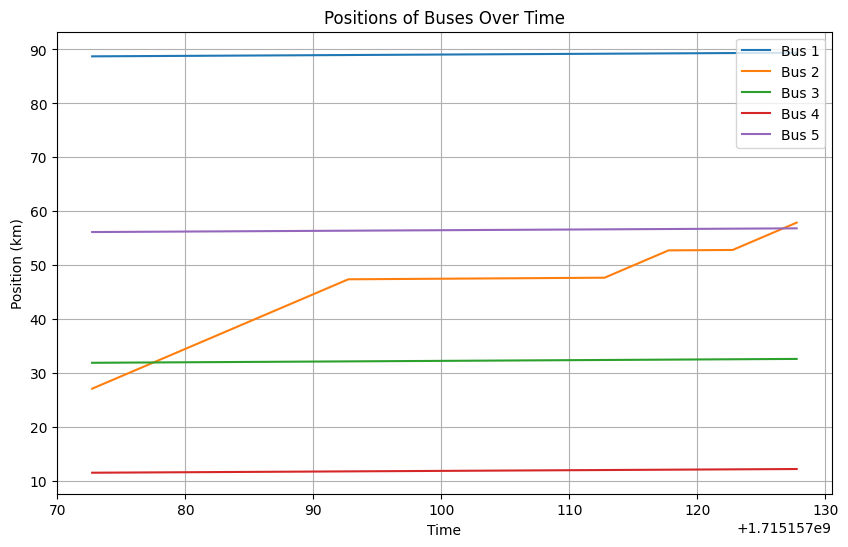

In [14]:
import matplotlib.pyplot as plt

# Calculate average speed of each bus
average_speeds = details_df.groupby('Bus')['Speed'].mean()

print("Average Speed of Each Bus:")
print(average_speeds)

# Visualize positions of buses over time
plt.figure(figsize=(10, 6))
for bus_name, group in details_df.groupby('Bus'):
    plt.plot(group['Time'], group['Position'], label=bus_name)

plt.xlabel('Time')
plt.ylabel('Position (km)')
plt.title('Positions of Buses Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
import pandas as pd
import numpy as np
s = pd.Series(list('abca'))
s1 = ['a', 'b', np.nan]
pd.get_dummies(s1)


,a,b
0,True,False
1,False,True
2,False,False


In [10]:
df = pd.DataFrame({'A': ['a', 'b', 'a'], 'B': ['b', 'a', 'c'], 'C': [1, 2, 3]})
df

,A,B,C
0,a,b,1
1,b,a,2
2,a,c,3


Title: Optimizing Bus Route Efficiency: A Case Study in Constant Speed Analysis

Slide 1: Introduction

Topic: "Optimizing Bus Route Efficiency: A Case Study"
Overview: Introduction to the real-world application of constant speed analysis in bus route optimization
Slide 2: Background

Bus Route: Route 101 from Downtown to Suburbia
Objective: Enhance efficiency and reliability of bus service
Challenges: Traffic congestion, variable road conditions, scheduled stops
Slide 3: Data Collection

Data Sources: GPS trackers installed on buses, traffic monitoring systems
Variables: Bus speed, distance covered, time taken at milestones
Duration: One week of continuous monitoring
Slide 4: Constant Speed Analysis

Hypothesis: Bus maintains a relatively constant speed along the route
Methodology: Calculating average speed over time intervals
Python Implementation: Script to analyze speed data and detect deviations
Slide 5: Distance Covered Verification

Linear Relationship: Distance covered increases steadily with time
Visualization: Graph plotting distance covered vs. time
Python Code: Script to calculate and visualize distance covered
Slide 6: Time Taken to Reach Milestones

Milestone Selection: Key stops along the route
Expected Time Calculation: Based on constant speed assumption
Comparison: Actual vs. expected time to reach milestones
Python Script: Calculate and compare milestone times
Slide 7: Predictability Assessment

Analysis: Consistency of bus behavior in adhering to schedule
Bus Schedule Optimization: Confidence in scheduling adjustments based on observed behavior
Visualization: Bus schedule before and after optimization
Slide 8: Performance Evaluation

Metrics: Speed consistency, punctuality
Benchmarking: Comparison with predefined standards
Python Analysis: Script to evaluate performance metrics
Slide 9: Results and Recommendations

Findings: Bus maintains consistent speed; slight deviations in punctuality observed
Recommendations: Adjust schedules for improved alignment with observed behavior
Next Steps: Continued monitoring and refinement of bus route optimization strategies
Slide 10: Conclusion

Summary: Constant speed analysis enhances bus route efficiency and reliability
Benefits: Improved service for passengers, reduced operational costs
Call to Action: Explore constant speed analysis tools for route optimization in other contexts
Slide 11: Q&A

Open the floor for questions and discussions
Note: Each slide includes relevant visuals such as graphs, Python code snippets, and real data examples to provide a comprehensive understanding of the case study.

Average Speed:
Calculating the average speed of each bus provides insights into the overall speed performance during the simulation.
By examining the average speed of each bus, we can identify if there are any significant variations in speed among different buses. This can help in understanding the efficiency of individual buses and potential areas for improvement.
Additionally, comparing the average speeds of different buses can highlight any disparities or inconsistencies in the operation of the bus fleet.

Distance Covered:
Analyzing the distance covered by each bus over time provides a measure of the progress made along the route.
By tracking the distance covered, we can observe how buses move along the route and whether they encounter any delays or deviations from the planned schedule.
Understanding the distance covered by each bus allows us to assess the overall progress of the fleet and identify any areas where buses may be lagging behind or advancing ahead.

Time Taken to Reach Certain Milestones:
Monitoring the time taken by buses to reach specific milestones or checkpoints along the route helps in evaluating punctuality and adherence to the schedule.
By comparing the actual time taken with the expected time, we can assess the efficiency and performance of the bus schedule.
Analyzing the time taken to reach milestones also enables us to identify potential bottlenecks or areas where buses experience delays, allowing for adjustments to improve overall reliability and timeliness.

Average Speed of the Vehicle: 50.0 km/h


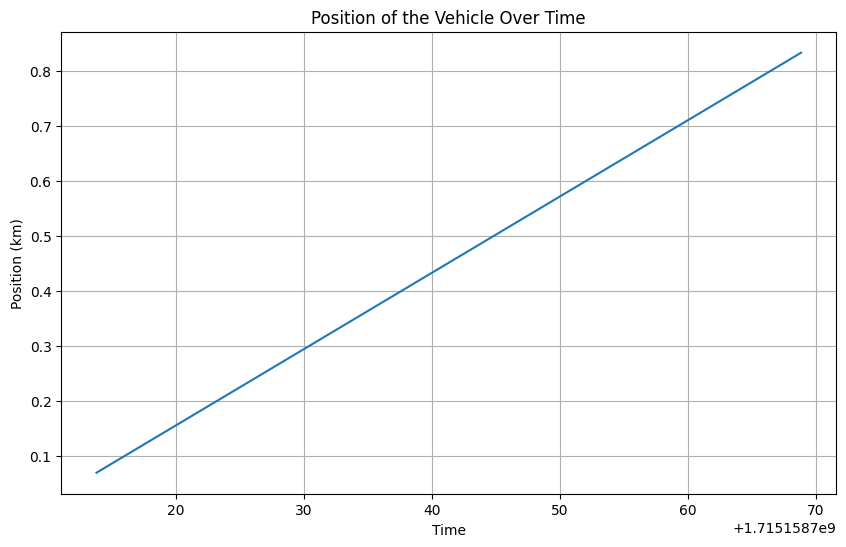

In [17]:
import numpy as np
import pandas as pd
import time
import random
import threading
import matplotlib.pyplot as plt

class Vehicle:
    def __init__(self, name, speed, position):
        self.name = name
        self.speed = speed  # Speed in km/h
        self.position = position  # Initial position along the route

    def move(self, interval, details):
        while True:
            time.sleep(interval)
            # Update position based on speed
            self.position += (self.speed / 3600) * interval  # Convert speed from km/h to km/s
            details.append({'Vehicle': self.name, 'Speed': self.speed, 'Position': self.position, 'Time': time.time()})

class VehicleTracker:
    def __init__(self, interval, model):
        self.interval = interval
        self.model = model

    def track(self):
        # Start tracking the vehicle
        details = []
        vehicle = Vehicle(name="Delivery Truck", speed=50, position=0)  # Initial position at 0 km
        threading.Thread(target=vehicle.move, args=(self.interval, details)).start()

        # Dynamic tracking loop
        start_time = time.time()
        end_time = start_time + 60 #3600  # Run for 1 hour
        while time.time() < end_time:
            # Wait for the next interval
            time.sleep(self.interval)

        # Convert details to DataFrame for analysis
        details_df = pd.DataFrame(details)
        return details_df

if __name__ == "__main__":
    # Create and start vehicle tracking
    interval = 5  # Interval between position updates in seconds
    tracker = VehicleTracker(interval, model=None)  # No model needed for single vehicle tracking
    details_df = tracker.track()

    # Calculate average speed
    average_speed = details_df['Speed'].mean()
    print("Average Speed of the Vehicle:", average_speed, "km/h")

    # Visualize positions of the vehicle over time
    plt.figure(figsize=(10, 6))
    plt.plot(details_df['Time'], details_df['Position'])
    plt.xlabel('Time')
    plt.ylabel('Position (km)')
    plt.title('Position of the Vehicle Over Time')
    plt.grid(True)
    plt.show()


In [18]:
import numpy as np
import pandas as pd
import time
import random
import threading
import matplotlib.pyplot as plt

class DeliveryTruck:
    def __init__(self, name, route_length):
        self.name = name
        self.route_length = route_length
        self.speed = random.randint(40, 60)  # Random speed between 40 and 60 km/h
        self.position = random.uniform(0, self.route_length)  # Random position along the route

    def move(self, interval, details):
        while True:
            time.sleep(interval)
            # Update position based on speed
            self.position += (self.speed / 3600) * interval  # Convert speed from km/h to km/s
            details.append({'Truck': self.name, 'Speed': self.speed, 'Position': self.position, 'Time': time.time()})

class FleetTracker:
    def __init__(self, interval, num_trucks):
        self.interval = interval
        self.num_trucks = num_trucks

    def track_fleet(self):
        # Start tracking the fleet
        details = []
        trucks = [DeliveryTruck(name=f"Truck {i+1}", route_length=100) for i in range(self.num_trucks)]
        for truck in trucks:
            threading.Thread(target=truck.move, args=(self.interval, details)).start()

        # Dynamic tracking loop
        start_time = time.time()
        end_time = start_time + 60 #3600  # Run for 1 hour
        while time.time() < end_time:
            # Wait for the next interval
            time.sleep(self.interval)

        # Convert details to DataFrame for analysis
        details_df = pd.DataFrame(details)
        return details_df

if __name__ == "__main__":
    # Create and start fleet tracking
    interval = 5  # Interval between position updates in seconds
    num_trucks = 5  # Number of trucks in the fleet
    tracker = FleetTracker(interval, num_trucks)
    details_df = tracker.track_fleet()

    # Calculate average speed of each truck
    average_speeds = details_df.groupby('Truck')['Speed'].mean()
    print("Average Speed of Each Truck:")
    print(average_speeds)

    # Visualize positions of trucks over time
    plt.figure(figsize=(10, 6))
    for truck_name, group in details_df.groupby('Truck'):
        plt.plot(group['Time'], group['Position'], label=truck_name)

    plt.xlabel('Time')
    plt.ylabel('Position (km)')
    plt.title('Positions of Trucks Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()


ValueError: Length of values (56) does not match length of index (57)

In [ ]:
import numpy as np
import pandas as pd
import time
import random
import threading
import matplotlib.pyplot as plt

class DeliveryTruck:
    def __init__(self, name, route_length):
        self.name = name
        self.route_length = route_length
        self.speed = random.randint(40, 60)  # Random speed between 40 and 60 km/h
        self.position = random.uniform(0, self.route_length)  # Random position along the route

    def move(self, interval, details, traffic_model):
        while True:
            # Simulate traffic conditions
            traffic_factor = traffic_model.get_traffic_factor(self.position)
            adjusted_speed = self.speed * traffic_factor

            # Update position based on adjusted speed
            self.position += (adjusted_speed / 3600) * interval  # Convert speed from km/h to km/s
            details.append({'Truck': self.name, 'Speed': adjusted_speed, 'Position': self.position, 'Time': time.time()})
            time.sleep(interval)

class TrafficModel:
    def __init__(self, route_length):
        self.route_length = route_length
        self.traffic_data = np.random.rand(self.route_length)  # Simulated traffic data for each kilometer of the route

    def get_traffic_factor(self, position):
        # Simple traffic model: Traffic factor ranges from 0.5 to 1.5 based on simulated traffic data
        index = int((position / self.route_length) * len(self.traffic_data))
        traffic_factor = 1.0 + (self.traffic_data[index] - 0.5)
        return traffic_factor

class FleetTracker:
    def __init__(self, interval, num_trucks, traffic_model):
        self.interval = interval
        self.num_trucks = num_trucks
        self.traffic_model = traffic_model

    def track_fleet(self):
        # Start tracking the fleet
        details = []
        trucks = [DeliveryTruck(name=f"Truck {i+1}", route_length=100) for i in range(self.num_trucks)]
        for truck in trucks:
            threading.Thread(target=truck.move, args=(self.interval, details, self.traffic_model)).start()

        # Dynamic tracking loop
        start_time = time.time()
        end_time = start_time + 3600  # Run for 1 hour
        while time.time() < end_time:
            # Periodically update traffic data (for demonstration purposes)
            self.traffic_model.update_traffic_data()
            time.sleep(10)  # Update traffic data every 10 seconds

        # Convert details to DataFrame for analysis
        details_df = pd.DataFrame(details)
        return details_df

if __name__ == "__main__":
    # Create traffic model and fleet tracker
    interval = 5  # Interval between position updates in seconds
    num_trucks = 5  # Number of trucks in the fleet
    traffic_model = TrafficModel(route_length=100)
    tracker = FleetTracker(interval, num_trucks, traffic_model)

    # Track the fleet and collect details
    details_df = tracker.track_fleet()

    # Calculate average speed of each truck
    average_speeds = details_df.groupby('Truck')['Speed'].mean()
    print("Average Speed of Each Truck:")
    print(average_speeds)

    # Visualize positions of trucks over time
    plt.figure(figsize=(10, 6))
    for truck_name, group in details_df.groupby('Truck'):
        plt.plot(group['Time'], group['Position'], label=truck_name)

    plt.xlabel('Time')
    plt.ylabel('Position (km)')
    plt.title('Positions of Trucks Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()



For an even more advanced scenario, let's introduce a dynamic routing system that optimizes the delivery routes of the trucks in real-time based on changing traffic conditions and delivery demand. We'll implement a simple version of this system using a combination of real-time data processing, machine learning for demand prediction, and optimization algorithms for route planning.

Here's a high-level overview of the components we'll include:

Dynamic Traffic Model: Similar to the previous example, we'll simulate dynamic traffic conditions that affect the speed of trucks on their routes.
Demand Prediction Model: We'll train a machine learning model to predict future delivery demand at various locations along the routes.
Route Optimization Algorithm: We'll implement a route optimization algorithm (e.g., genetic algorithm, simulated annealing) that continuously adjusts the routes of trucks based on real-time traffic conditions and predicted demand.
Real-time Data Processing: We'll use a data processing pipeline to handle streaming data from various sources, including traffic updates, delivery requests, and fleet status.
Visualization and Monitoring: We'll create a dashboard or visualization tool to monitor the fleet's activity, including truck positions, current routes, predicted demand, and optimized routes.

In [27]:
# !qut

! pip install dash --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 16.6 MB/s eta 0:00:00


In [28]:
# ! pip install dash --quiet

from dash import Dash, dash_table
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/solar.csv')

app = Dash(__name__)

app.layout = dash_table.DataTable(df.to_dict('records'), [{"name": i, "id": i} for i in df.columns])

if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>

In [31]:
dash_table.DataTable(
    df.to_dict('records'),
    [{"name": i, "id": i} for i in df.columns]
)
dash_table.DataTable(
    data=df.to_dict('records'),
    columns=[{"name": i, "id": i} for i in df.columns]
)
dash_table.DataTable(df.to_dict('records'))


DataTable(data=[{'State': 'California', 'Number of Solar Plants': 289, 'Installed Capacity (MW)': 4395, 'Average MW Per Plant': 15.3, 'Generation (GWh)': 10826}, {'State': 'Arizona', 'Number of Solar Plants': 48, 'Installed Capacity (MW)': 1078, 'Average MW Per Plant': 22.5, 'Generation (GWh)': 2550}, {'State': 'Nevada', 'Number of Solar Plants': 11, 'Installed Capacity (MW)': 238, 'Average MW Per Plant': 21.6, 'Generation (GWh)': 557}, {'State': 'New Mexico', 'Number of Solar Plants': 33, 'Installed Capacity (MW)': 261, 'Average MW Per Plant': 7.9, 'Generation (GWh)': 590}, {'State': 'Colorado', 'Number of Solar Plants': 20, 'Installed Capacity (MW)': 118, 'Average MW Per Plant': 5.9, 'Generation (GWh)': 235}, {'State': 'Texas', 'Number of Solar Plants': 12, 'Installed Capacity (MW)': 187, 'Average MW Per Plant': 15.6, 'Generation (GWh)': 354}, {'State': 'North Carolina', 'Number of Solar Plants': 148, 'Installed Capacity (MW)': 669, 'Average MW Per Plant': 4.5, 'Generation (GWh)': 11

In [33]:
! pip install dash_bootstrap_components --quiet
from dash import Dash, Input, Output, callback, dash_table
import pandas as pd
import dash_bootstrap_components as dbc

df = pd.read_csv('https://git.io/Juf1t')

app = Dash(external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = dbc.Container([
    dbc.Label('Click a cell in the table:'),
    dash_table.DataTable(df.to_dict('records'),[{"name": i, "id": i} for i in df.columns], id='tbl'),
    dbc.Alert(id='tbl_out'),
])

@callback(Output('tbl_out', 'children'), Input('tbl', 'active_cell'))
def update_graphs(active_cell):
    return str(active_cell) if active_cell else "Click the table"

if __name__ == "__main__":
    app.run(debug=True)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 1.5 MB/s eta 0:00:00


<IPython.core.display.Javascript object>

In [41]:
import os
import threading
import time

def optimize_route(truck_id, origin, destination):
    # Set the nice value to a desired level
    os.nice(10)  # Lower priority for route .
    # This means that the route optimization threads may get slightly more CPU time compared to other processes running on the system.

    # Simulate route optimization process
    print(f"Optimizing route for truck {truck_id} from {origin} to {destination}")
    time.sleep(2)  # Simulate processing time
    print(f"Route optimized for truck {truck_id}")

# Create and start threads for route optimization
requests = [
    (1, "Warehouse A", "Customer X"),
    (4, "Warehouse B", "Customer Y"),
    (3, "Warehouse C", "Customer Z"),
]

threads = []
for request in requests:
    thread = threading.Thread(target=optimize_route, args=request)
    threads.append(thread)
    thread.start()

# Wait for all threads to complete
for thread in threads:
    thread.join()

print("All route optimizations completed")


Optimizing route for truck 1 from Warehouse A to Customer X
Optimizing route for truck 4 from Warehouse B to Customer Y
Optimizing route for truck 3 from Warehouse C to Customer Z
Route optimized for truck 1
Route optimized for truck 4
Route optimized for truck 3
All route optimizations completed


Dynamic Traffic Model:
You can simulate dynamic traffic conditions using historical traffic data and a traffic simulation model.
Depending on your choice of programming language, you could use libraries like NetworkX or SimPy to model traffic flow on a network.
Introduce factors like accidents, road closures, or congestion to simulate real-world scenarios.

Demand Prediction Model:
Train a machine learning model, possibly using techniques like regression, time series forecasting, or even more advanced methods like recurrent neural networks (RNNs) or Long Short-Term Memory (LSTM) networks.
Use historical delivery data, weather patterns, seasonal trends, and any other relevant data to train the model.
Popular libraries for this could include scikit-learn, TensorFlow, or PyTorch.

Route Optimization Algorithm:
Implement a route optimization algorithm that continuously adjusts routes based on real-time traffic conditions and predicted demand.
Genetic algorithms, simulated annealing, or even more modern techniques like reinforcement learning could be used.
You can code these algorithms from scratch or use existing libraries like DEAP for genetic algorithms or ortools for optimization problems.

Real-time Data Processing:
Set up a data processing pipeline to handle streaming data from various sources.
Utilize technologies like Apache Kafka, Apache Flink, or Apache Spark for real-time data processing.
This pipeline should handle streaming updates from traffic APIs, delivery requests, and fleet status updates.

Visualization and Monitoring:
Develop a dashboard or visualization tool to monitor fleet activity.
You can use web development frameworks like React.js or Dash for Python to create interactive visualizations.
Real-time data from the processing pipeline can be visualized to show truck positions, current routes, predicted demand, and optimized routes.

Length of road from A to B: 5
Speed limit of road from B to C: 40


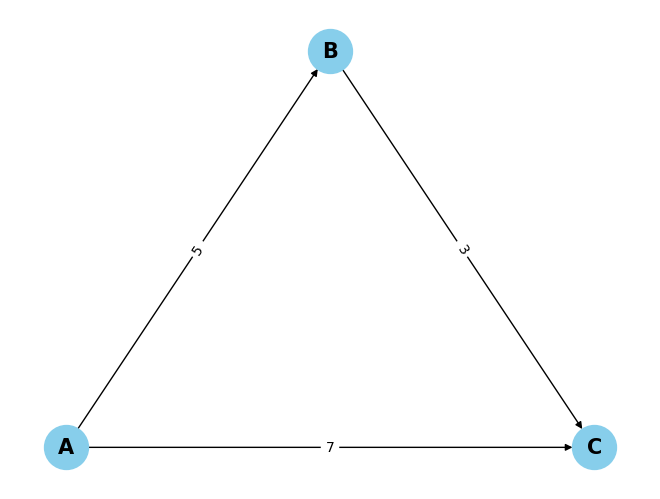

KeyboardInterrupt: 

In [44]:
# Sample pseudocode for simulating dynamic traffic conditions

class TrafficSimulator:
    def __init__(self, road_network):
        self.road_network = road_network

    def update_traffic_conditions(self):
        # Simulate changes in traffic conditions
        # Update road speeds, congestion levels, etc.
        pass

    def get_speed_on_road(self, road):
        # Return current speed on a given road
        pass


import networkx as nx

# Create a directed graph representing the road network
road_network = nx.DiGraph()

# Add nodes representing intersections or locations
road_network.add_node("A", pos=(0, 0))
road_network.add_node("B", pos=(1, 1))
road_network.add_node("C", pos=(2, 0))

# Add edges representing roads between locations
road_network.add_edge("A", "B", length=5, speed_limit=50)
road_network.add_edge("B", "C", length=3, speed_limit=40)
road_network.add_edge("A", "C", length=7, speed_limit=60)

# You can add more nodes and edges as needed to represent your road network

# Example of accessing edge attributes
print("Length of road from A to B:", road_network["A"]["B"]["length"])
print("Speed limit of road from B to C:", road_network["B"]["C"]["speed_limit"])

# Example of visualizing the road network
import matplotlib.pyplot as plt

pos = nx.get_node_attributes(road_network, 'pos')
nx.draw(road_network, pos, with_labels=True, node_size=1000, node_color="skyblue", font_size=15, font_weight="bold")
edge_labels = nx.get_edge_attributes(road_network, 'length')
nx.draw_networkx_edge_labels(road_network, pos, edge_labels=edge_labels)
plt.show()


# Usage example
traffic_simulator = TrafficSimulator(road_network)
while True:
    traffic_simulator.update_traffic_conditions()
    time.sleep(6)  # Update traffic conditions every minute


Length of road from A to B: 3
Speed limit of road from B to C: 43


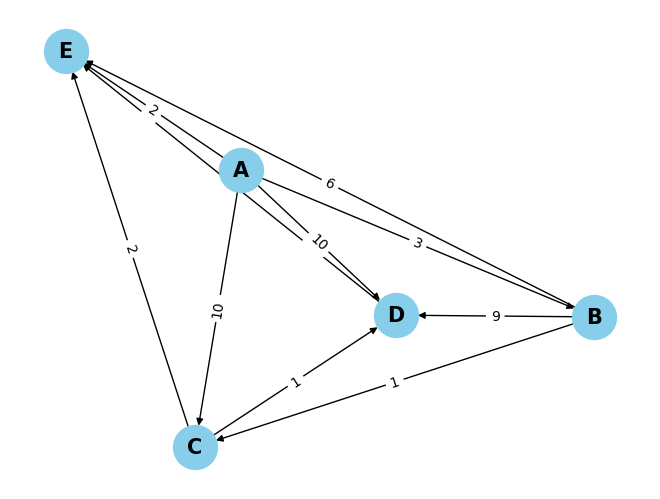

In [45]:
import networkx as nx
import random

# Create a directed graph representing the road network
road_network = nx.DiGraph()

# Add nodes representing intersections or locations
locations = ["A", "B", "C", "D", "E"]
for location in locations:
    road_network.add_node(location, pos=(random.uniform(0, 10), random.uniform(0, 10)))

# Add edges representing roads between locations with random lengths and speed limits
for i in range(len(locations)):
    for j in range(i+1, len(locations)):
        length = random.randint(1, 10)  # Random length between 1 and 10
        speed_limit = random.randint(30, 60)  # Random speed limit between 30 and 60
        road_network.add_edge(locations[i], locations[j], length=length, speed_limit=speed_limit)

# Example of accessing edge attributes
print("Length of road from A to B:", road_network["A"]["B"]["length"])
print("Speed limit of road from B to C:", road_network["B"]["C"]["speed_limit"])

# Example of visualizing the road network
import matplotlib.pyplot as plt

pos = nx.get_node_attributes(road_network, 'pos')
nx.draw(road_network, pos, with_labels=True, node_size=1000, node_color="skyblue", font_size=15, font_weight="bold")
edge_labels = nx.get_edge_attributes(road_network, 'length')
nx.draw_networkx_edge_labels(road_network, pos, edge_labels=edge_labels)
plt.show()


Capacity of Location_1: 75
Demand at Location_2: 49


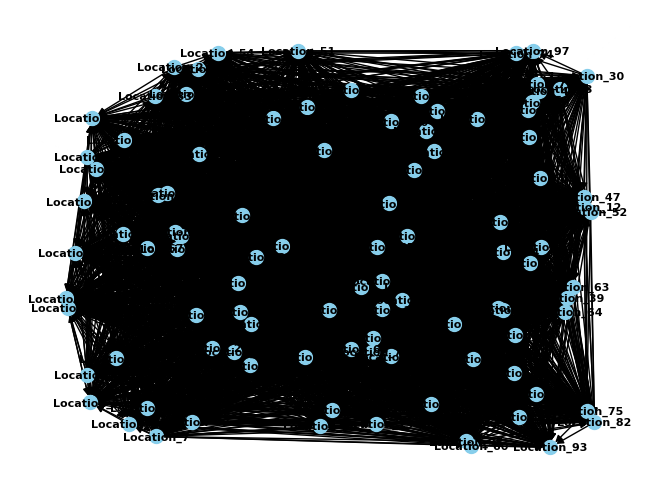

In [46]:
import networkx as nx
import random

# Create a directed graph representing the road network
road_network = nx.DiGraph()

# Add nodes representing intersections or locations with logistic shipping details
locations = ["Location_" + str(i) for i in range(100)]
for location in locations:
    road_network.add_node(location,
                          pos=(random.uniform(0, 10), random.uniform(0, 10)),
                          capacity=random.randint(50, 200),  # Random capacity between 50 and 200
                          demand=random.randint(10, 100))  # Random demand between 10 and 100

# Add edges representing roads between locations with random lengths and speed limits
for i in range(len(locations)):
    for j in range(i+1, len(locations)):
        length = random.randint(1, 10)  # Random length between 1 and 10
        speed_limit = random.randint(30, 60)  # Random speed limit between 30 and 60
        road_network.add_edge(locations[i], locations[j], length=length, speed_limit=speed_limit)

# Example of accessing node attributes
print("Capacity of Location_1:", road_network.nodes["Location_1"]["capacity"])
print("Demand at Location_2:", road_network.nodes["Location_2"]["demand"])

# Example of visualizing the road network
import matplotlib.pyplot as plt

pos = nx.get_node_attributes(road_network, 'pos')
nx.draw(road_network, pos, with_labels=True, node_size=100, node_color="skyblue", font_size=8, font_weight="bold")
plt.show()


In [48]:
! pip install mpld3 --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 1.7 MB/s eta 0:00:00


In [ ]:
import networkx as nx
import random
import mpld3
from mpld3 import plugins

# Create a directed graph representing the road network
road_network = nx.DiGraph()

# Add nodes representing intersections or locations with logistic shipping details
locations = ["Location_" + str(i) for i in range(100)]
for location in locations:
    road_network.add_node(location,
                          pos=(random.uniform(0, 10), random.uniform(0, 10)),
                          capacity=random.randint(50, 200),  # Random capacity between 50 and 200
                          demand=random.randint(10, 100))  # Random demand between 10 and 100

# Add edges representing roads between locations with random lengths and speed limits
for i in range(len(locations)):
    for j in range(i+1, len(locations)):
        length = random.randint(1, 10)  # Random length between 1 and 10
        speed_limit = random.randint(30, 60)  # Random speed limit between 30 and 60
        road_network.add_edge(locations[i], locations[j], length=length, speed_limit=speed_limit)

# Example of accessing node attributes
print("Capacity of Location_1:", road_network.nodes["Location_1"]["capacity"])
print("Demand at Location_2:", road_network.nodes["Location_2"]["demand"])

# Create plot
fig, ax = plt.subplots()
pos = nx.get_node_attributes(road_network, 'pos')
nx.draw(road_network, pos, with_labels=True, node_size=100, node_color="skyblue", font_size=8, font_weight="bold", ax=ax)

# Define a plugin to allow node expansion on click
class ExpandNodePlugin(plugins.PluginBase):
    JAVASCRIPT = """
    mpld3.register_plugin("expandnode", ExpandNodePlugin);
    ExpandNodePlugin.prototype = Object.create(mpld3.Plugin.prototype);
    ExpandNodePlugin.prototype.constructor = ExpandNodePlugin;
    ExpandNodePlugin.prototype.requiredProps = ["nodes"];
    ExpandNodePlugin.prototype.defaultProps = {};
    function ExpandNodePlugin(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    ExpandNodePlugin.prototype.draw = function(){
        var nodes = this.props.nodes;
        var fig = this.fig;
        var ax = fig.axes[0];

        function expandNode(d, i){
            var neighbors = nodes[d];
            if (neighbors) {
                for (var j=0; j < neighbors.length; j++){
                    ax.text(pos[neighbors[j]][0], pos[neighbors[j]][1], neighbors[j], color='red', fontsize=12);
                }
                fig.canvas.draw();
            }
        }

        for (var i=0; i < ax.collections.length; i++){
            var collection = ax.collections[i];
            if (collection.get_paths().length == 1){
                var paths = collection.get_paths();
                for (var j=0; j < paths.length; j++){
                    var node = paths[j];
                    node.on("click", expandNode);
                }
            }
        }
    };
    """

    def __init__(self, nodes):
        self.dict_ = {"type": "expandnode", "nodes": nodes}

# Create plugin
nodes = {node: list(road_network.neighbors(node)) for node in road_network.nodes()}
expand_node_plugin = ExpandNodePlugin(nodes)

# Add plugin to figure
mpld3.plugins.connect(fig, expand_node_plugin)

# Show plot
mpld3.display()


In [53]:
import random
# Creating a list of fruits
fruits = ["apple", "banana", "cherry", "orange", "pear"]
# Using random.choice to select a random element from the list
random_fruit = random.choice(fruits)
print(random_fruit)


apple


In [58]:
# Sample pseudocode for simulating dynamic traffic conditions
import random
class TrafficSimulator:
    def __init__(self, road_network):
        self.road_network = road_network

    def update_traffic_conditions(self):
        # Simulate changes in traffic conditions
        # Update road speeds, congestion levels, etc.
        pass

    def get_speed_on_road(self, road):
        # Return current speed on a given road
        speed_repositry = [i  for i in range(100)]
        return  random.chice(speed_repositry)

# Usage example
traffic_simulator = TrafficSimulator(road_network)
# while True:
i =0
while i>100:
    traffic_simulator.update_traffic_conditions()
    i +=1
#    time.sleep(1)  # Update traffic conditions every minute :60


In [ ]:
# Sample pseudocode for training a demand prediction model

class DemandPredictor:
    def __init__(self, data):
        self.model = self.train_model(data)

    def train_model(self, data):
        # Train machine learning model using historical data
        # Return trained model
        pass

    def predict_demand(self, location, time):
        # Use trained model to predict demand at a given location and time
        pass

# Usage example
demand_predictor = DemandPredictor(training_data)
predicted_demand = demand_predictor.predict_demand(location, time)


In [ ]:
# Sample pseudocode for a route optimization algorithm

class RouteOptimizer:
    def __init__(self, initial_routes):
        self.routes = initial_routes

    def optimize_routes(self, traffic_data, demand_data):
        # Use optimization algorithm to adjust routes based on traffic conditions and demand predictions
        pass

# Usage example
route_optimizer = RouteOptimizer(initial_routes)
optimized_routes = route_optimizer.optimize_routes(traffic_data, demand_data)


In [104]:
import random
import numpy as np

class TrafficPathGA:
    def __init__(self, graph, population_size=50, elite_size=10, mutation_rate=0.01, generations=100):
        self.graph = graph
        self.population_size = population_size
        self.elite_size = elite_size
        self.mutation_rate = mutation_rate
        self.generations = generations

    def initialize_population(self):
        population = []
        for _ in range(self.population_size):
            route = list(self.graph.keys())
            random.shuffle(route)
            population.append(route)
        return population

    def fitness(self, route):
        total_distance = 0
        for i in range(len(route) - 1):
            total_distance += self.graph[route[i]][route[i+1]]
        return 1 / total_distance

    def rank_routes(self, population):
        return sorted(population, key=lambda x: self.fitness(x), reverse=True)

    def selection(self, ranked_population):
        return ranked_population[:self.elite_size]

    def breed(self, parent1, parent2):
        child = []
        gene1, gene2 = -1, -1
        while gene1 == gene2:
            gene1 = random.randint(0, len(parent1) - 1)
            gene2 = random.randint(0, len(parent2) - 1)
        start_gene = min(gene1, gene2)
        end_gene = max(gene1, gene2)
        for i in range(start_gene, end_gene):
            child.append(parent1[i])
        for gene in parent2:
            if gene not in child:
                child.append(gene)
        return child

    def breed_population(self, selected_population):
        children = []
        for i in range(len(selected_population) - self.elite_size):
            parent1 = random.choice(selected_population)
            parent2 = random.choice(selected_population)
            child = self.breed(parent1, parent2)
            children.append(child)
        return children

    def mutate(self, individual):
        for swapped in range(len(individual)):
            if random.random() < self.mutation_rate:
                swap_with = random.randint(0, len(individual) - 1)
                individual[swapped], individual[swap_with] = individual[swap_with], individual[swapped]
        return individual

    def mutate_population(self, population):
        mutated_population = []
        for individual in population:
            mutated_individual = self.mutate(individual)
            mutated_population.append(mutated_individual)
        return mutated_population

    def evolve(self):
        population = self.initialize_population()
        for generation in range(self.generations):
            ranked_population = self.rank_routes(population)
            elite = self.selection(ranked_population)
            breeders = self.breed_population(ranked_population)
            next_population = elite + breeders
            population = self.mutate_population(next_population)
        best_route = ranked_population[0]
        return best_route

#Assume graph is a dictionary representing the traffic network with travel times or distances as edge weights
graph = {
   'A': {'B': 5, 'C': 2, 'D': 6},
     'B': {'A': 5, 'C': 3, 'D': 1},
     'C': {'A': 2, 'B': 3, 'D': 7},
     'D': {'A': 6, 'B': 1, 'C': 7}
 }

traffic_path_ga = TrafficPathGA(graph)
best_route = traffic_path_ga.evolve()
print("Best Route:", best_route)


Best Route: ['A', 'C', 'B', 'D']


In [ ]:
# Sample pseudocode for real-time data processing pipeline

from kafka import KafkaConsumer

consumer = KafkaConsumer('traffic_updates', 'delivery_requests', 'fleet_status', bootstrap_servers='localhost:9092')

for message in consumer:
    topic = message.topic
    data = message.value
    if topic == 'traffic_updates':
        process_traffic_update(data)
    elif topic == 'delivery_requests':
        process_delivery_request(data)
    elif topic == 'fleet_status':
        process_fleet_status(data)


In [ ]:
# Sample pseudocode for a simple monitoring dashboard using Flask and Plotly

from flask import Flask, render_template
import plotly.graph_objs as go

app = Flask(__name__)

@app.route('/')
def index():
    # Generate plotly figures for visualization
    fig = go.Figure(...)

    return render_template('dashboard.html', plot=fig.to_html())

if __name__ == '__main__':
    app.run(debug=True)


In [112]:
import pandas as pd
import numpy as np
import time
import networkx as nx

# Sample historical delivery data
delivery_data = pd.DataFrame({
    'location': ['A', 'B', 'C', 'D'],
    'demand': [100, 150, 80, 120]
})

class TrafficSimulator:
    def __init__(self, road_network):
        self.road_network = road_network

    def update_traffic_conditions(self):
        # Simulate changes in traffic conditions
        for u, v in self.road_network.edges():
            self.road_network[u][v]['current_speed'] = np.random.randint(30, self.road_network[u][v]['speed_limit'])

    def get_speed_on_road(self, road):
        return self.road_network[road[0]][road[1]]['current_speed']

class DemandPredictor:
    def __init__(self, delivery_data):
        self.delivery_data = delivery_data.set_index('location')

    def predict_demand(self, location):
        # Sample prediction: return demand at a given location
        return self.delivery_data.loc[location, 'demand']

class RouteOptimizer():
    def __init__(self, initial_routes):
        self.routes = initial_routes

    def optimize_routes(self, traffic_data, demand_data):
        # Sample optimization: just return the same routes for demonstration

        return self.routes

# Create a graph representing the road network
road_network = nx.Graph()
road_network.add_edge('A', 'B', speed_limit=60)
road_network.add_edge('B', 'C', speed_limit=50)
road_network.add_edge('C', 'D', speed_limit=55)
# Add more roads as needed

# Sample initial routes
initial_routes = {
    'truck_1': ['A', 'B', 'C'],
    'truck_2': ['D', 'C', 'B']
}

# Sample real-time data processing
traffic_simulator = TrafficSimulator(road_network)
demand_predictor = DemandPredictor(delivery_data)
route_optimizer = RouteOptimizer(initial_routes)

# Simulate real-time data processing and route optimization
for i in range(5):  # Simulate for 5 iterations
    traffic_simulator.update_traffic_conditions()
    traffic_data = road_network  # Simplified traffic data
    demand_data = {location: demand_predictor.predict_demand(location) for location in ['A', 'B', 'C', 'D']}
    optimized_routes = route_optimizer.optimize_routes(traffic_data, demand_data)
    print(f"Iteration {i+1}: Optimized Routes - {optimized_routes}")
    time.sleep(2)  # Simulate processing time

# Sample report generation using pandas
report_data = {'Truck': [], 'Route': []}
for truck, route in optimized_routes.items():
    report_data['Truck'].append(truck)
    report_data['Route'].append(' -> '.join(route))

report_df = pd.DataFrame(report_data)
print("\nGenerated Report:")
print(report_df)


Iteration 1: Optimized Routes - {'truck_1': ['A', 'B', 'C'], 'truck_2': ['D', 'C', 'B']}
Iteration 2: Optimized Routes - {'truck_1': ['A', 'B', 'C'], 'truck_2': ['D', 'C', 'B']}
Iteration 3: Optimized Routes - {'truck_1': ['A', 'B', 'C'], 'truck_2': ['D', 'C', 'B']}
Iteration 4: Optimized Routes - {'truck_1': ['A', 'B', 'C'], 'truck_2': ['D', 'C', 'B']}
Iteration 5: Optimized Routes - {'truck_1': ['A', 'B', 'C'], 'truck_2': ['D', 'C', 'B']}

Generated Report:
     Truck        Route
0  truck_1  A -> B -> C
1  truck_2  D -> C -> B


In [109]:
class RouteOptimizer(TrafficPathGA):
    def __init__(self, initial_routes):
        super().__init__()
        self.routes = initial_routes

    def optimize_routes(self, traffic_data, demand_data):
        optimized_routes = []
        for route in self.routes:
            # Convert the route to indices for optimization
            route_indices = [node_index[node] for node in route]

            # Use the genetic algorithm to optimize the route
            optimized_route_indices = self.evolve(route_indices)

            # Convert the optimized route back to node names
            optimized_route = [node_list[index] for index in optimized_route_indices]
            optimized_routes.append(optimized_route)
        return optimized_routes


In [108]:
# Example usage
# Define initial routes and traffic network graph
initial_routes = [['A', 'B', 'C'], ['B', 'A', 'D', 'C']]
graph = {
    'A': {'B': 5, 'C': 2, 'D': 6},
    'B': {'A': 5, 'C': 3, 'D': 1},
    'C': {'A': 2, 'B': 3, 'D': 7},
    'D': {'A': 6, 'B': 1, 'C': 7}
}

# Create a RouteOptimizer instance
optimizer = RouteOptimizer(graph, initial_routes)

# Optimize routes
optimized_routes = optimizer.optimize_routes()
print("Optimized Routes:", optimized_routes)

TypeError: RouteOptimizer.__init__() takes 2 positional arguments but 3 were given

In [68]:
traffic_data = {edge: {'current_speed': road_network.edges[edge]['speed_limit']} for edge in road_network.edges() if edge in road_network.edges}
traffic_data

{('A', 'B'): {'current_speed': 60},
 ('B', 'C'): {'current_speed': 50},
 ('C', 'D'): {'current_speed': 55}}

In [73]:
traffic_data = {edge: {'current_speed': road_network[edge[0]][edge[1]]['speed_limit']} for edge in road_network.edges()}
print(traffic_data)
# Sample real-time data processing
traffic_data = {edge: {'current_speed': road_network.edges[edge]['speed_limit']} for edge in road_network.edges() if edge in road_network.edges}
demand_data = {location: demand_predictor.predict_demand(location) for location in ['A', 'B', 'C', 'D']}
optimized_routes = route_optimizer.optimize_routes(traffic_data, demand_data)

# Sample report generation using pandas
report_data = {'Truck': [], 'Route': []}
for truck, route in optimized_routes.items():
    report_data['Truck'].append(truck)
    report_data['Route'].append(' -> '.join(route))

report_df = pd.DataFrame(report_data)
print("\nGenerated Report:")
print(report_df)

{('A', 'B'): {'current_speed': 60}, ('B', 'C'): {'current_speed': 50}, ('C', 'D'): {'current_speed': 55}}


KeyError: 'A'

In [72]:
traffic_data = {edge: {'current_speed': road_network[edge[0]][edge[1]]['speed_limit']} for edge in road_network.edges()}
print(traffic_data)

{('A', 'B'): {'current_speed': 60}, ('B', 'C'): {'current_speed': 50}, ('C', 'D'): {'current_speed': 55}}


In [76]:
import random
import math

class RouteOptimizer:
    def __init__(self, initial_routes, road_network):
        self.routes = initial_routes
        self.road_network = road_network

    def optimize_routes(self, traffic_data, demand_data, max_iterations=1000, initial_temperature=100.0, cooling_rate=0.003):
        current_solution = self.routes.copy()
        best_solution = current_solution.copy()

        current_energy = self.calculate_energy(current_solution, traffic_data, demand_data)
        best_energy = current_energy

        temperature = initial_temperature

        for iteration in range(max_iterations):
            new_solution = self.get_neighbor_solution(current_solution)
            new_energy = self.calculate_energy(new_solution, traffic_data, demand_data)

            if self.acceptance_probability(current_energy, new_energy, temperature) > random.random():
                current_solution = new_solution
                current_energy = new_energy

            if current_energy < best_energy:
                best_solution = current_solution
                best_energy = current_energy

            temperature *= 1 - cooling_rate

        return best_solution

    def get_neighbor_solution(self, current_solution):
        # Generate a neighboring solution by randomly swapping two locations in a route
        neighbor_solution = current_solution.copy()
        truck = random.choice(list(neighbor_solution.keys()))
        route = neighbor_solution[truck]
        idx1, idx2 = random.sample(range(len(route)), 2)
        route[idx1], route[idx2] = route[idx2], route[idx1]
        return neighbor_solution

    def acceptance_probability(self, current_energy, new_energy, temperature):
        if new_energy < current_energy:
            return 1.0
        else:
            return math.exp((current_energy - new_energy) / temperature)
    """

    def calculate_energy(self, solution, traffic_data, demand_data):
        # Simple energy function: sum of travel times and demand imbalances
        total_energy = 0
        for truck, route in solution.items():
            total_energy += self.calculate_route_energy(route, traffic_data)
            total_energy += abs(sum(demand_data[loc] for loc in route) - len(route) * 100)  # Penalize demand imbalance
        return total_energy

    """
    def calculate_route_energy(self, route, traffic_data):
        # Calculate energy (travel time) for a single route based on traffic data
        energy = 0
        for i in range(len(route) - 1):
            edge = (route[i], route[i + 1])
            if edge in traffic_data:
                current_speed = traffic_data[edge]['current_speed']  # Corrected access to traffic_data
                energy += self.calculate_travel_time(self.distance(edge), current_speed)
        return energy

    def calculate_route_energy(self, route, traffic_data):
        # Calculate energy (travel time) for a single route based on traffic data
        energy = 0
        for i in range(len(route) - 1):
            edge = (route[i], route[i + 1])
            if edge in traffic_data:
                speed_limit = self.road_network[edge[0]][edge[1]]['speed_limit']
                current_speed = traffic_data[edge[0]][edge[1]]['current_speed']
                energy += self.calculate_travel_time(self.distance(edge), speed_limit, current_speed)
        return energy

    def distance(self, edge):
        # Simple distance function: 1 for now, can be enhanced based on actual road distances
        return 1

    def calculate_travel_time(self, distance, speed_limit, current_speed):
        # Calculate travel time based on distance and current speed
        return distance / max(current_speed, 1) * 60  # Convert to minutes


# Sample initial routes
initial_routes = {
    'truck_1': ['A', 'B', 'C'],
    'truck_2': ['D', 'C', 'B']
}

traffic_data = {edge: {'current_speed': road_network[edge[0]][edge[1]]['speed_limit']} for edge in road_network.edges()}


# Sample real-time data processing
road_network = nx.Graph()
road_network.add_edge('A', 'B', speed_limit=60)
road_network.add_edge('B', 'C', speed_limit=50)
road_network.add_edge('C', 'D', speed_limit=55)


if ('A', 'B') not in traffic_data or ('A', 'B') not in road_network:
    raise ValueError("Edge ('A', 'B') not found in traffic_data or road_network")

traffic_simulator = TrafficSimulator(road_network)
demand_predictor = DemandPredictor(delivery_data)
route_optimizer = RouteOptimizer(initial_routes, road_network)

# Simulate real-time data processing and route optimization
traffic_data = {edge: {'current_speed': road_network[edge[0]][edge[1]]['speed_limit']} for edge in road_network.edges()}
demand_data = {location: demand_predictor.predict_demand(location) for location in ['A', 'B', 'C', 'D']}
optimized_routes = route_optimizer.optimize_routes(traffic_data, demand_data)

# Sample report generation using pandas
report_data = {'Truck': [], 'Route': []}
for truck, route in optimized_routes.items():
    report_data['Truck'].append(truck)
    report_data['Route'].append(' -> '.join(route))

report_df = pd.DataFrame(report_data)
print("\nGenerated Report:")
print(report_df)


ValueError: Edge ('A', 'B') not found in traffic_data or road_network

In [96]:
import random
import math
import networkx as nx
import pandas as pd

class RouteOptimizer:
    def __init__(self, initial_routes, road_network):
        self.routes = initial_routes
        self.road_network = road_network

    def optimize_routes(self, traffic_data, demand_data, max_iterations=1000, initial_temperature=100.0, cooling_rate=0.003):
        current_solution = self.routes.copy()
        best_solution = current_solution.copy()

        current_energy = self.calculate_energy(current_solution, traffic_data, demand_data)
        best_energy = current_energy

        temperature = initial_temperature

        for iteration in range(max_iterations):
            new_solution = self.get_neighbor_solution(current_solution)
            new_energy = self.calculate_energy(new_solution, traffic_data, demand_data)

            if self.acceptance_probability(current_energy, new_energy, temperature) > random.random():
                current_solution = new_solution
                current_energy = new_energy

            if current_energy < best_energy:
                best_solution = current_solution
                best_energy = current_energy

            temperature *= 1 - cooling_rate

        return best_solution

    def get_neighbor_solution(self, current_solution):
        # Generate a neighboring solution by randomly swapping two locations in a route
        neighbor_solution = current_solution.copy()
        truck = random.choice(list(neighbor_solution.keys()))
        route = neighbor_solution[truck]
        idx1, idx2 = random.sample(range(len(route)), 2)
        route[idx1], route[idx2] = route[idx2], route[idx1]
        return neighbor_solution

    def acceptance_probability(self, current_energy, new_energy, temperature):
        if new_energy < current_energy:
            return 1.0
        else:
            return math.exp((current_energy - new_energy) / temperature)

    def calculate_energy(self, solution, traffic_data, demand_data):
        # Simple energy function: sum of travel times and demand imbalances
        total_energy = 0
        for truck, route in solution.items():
            total_energy += self.calculate_route_energy(route, traffic_data)
            total_energy += abs(sum(demand_data[loc] for loc in route) - len(route) * 100)  # Penalize demand imbalance
        return total_energy

    def calculate_route_energy(self, route, traffic_data):
        energy = 0
        for i in range(len(route) - 1):
            edge = (route[i], route[i + 1])
            if edge in traffic_data:
                speed_limit = self.road_network[edge[0]][edge[1]]['speed_limit']
                current_speed = traffic_data.get(edge, {}).get('current_speed', speed_limit)
                energy += self.calculate_travel_time(self.distance(edge), speed_limit, current_speed)
                if edge in traffic_data:current_speed = traffic_data[edge]['current_speed']
                else:    raise KeyError(f"Missing traffic data for edge: {edge}")
            else:
                raise KeyError(f"Missing traffic data for edge: {edge}")
        return energy

    def distance(self, edge):
        # Simple distance function: 1 for now, can be enhanced based on actual road distances
        return 1

    def calculate_travel_time(self, distance, speed_limit, current_speed):
        # Calculate travel time based on distance and current speed
        return distance / max(current_speed, 1) * 60  # Convert to minutes


# Sample initial routes
initial_routes = {
    'truck_1': ['A', 'B', 'C'],
    'truck_2': ['D', 'C', 'B']
}

# Sample real-time data processing
road_network = nx.Graph()
road_network.add_edge('A', 'B', speed_limit=60)
road_network.add_edge('B', 'C', speed_limit=50)
road_network.add_edge('C', 'D', speed_limit=55)

"""traffic_data = {('A', 'B'): {'current_speed': road_network['A']['B']['speed_limit']},
                ('B', 'C'): {'current_speed': road_network['B']['C']['speed_limit']},
                ('C', 'D'): {'current_speed': road_network['C']['D']['speed_limit']}}"""

# Sample real-time data processing
road_network = nx.Graph()
road_network.add_edge('A', 'B', speed_limit=60)
road_network.add_edge('B', 'C', speed_limit=50)
road_network.add_edge('C', 'D', speed_limit=55)

# Initialize traffic data for all edges with some default value
traffic_data = {(edge[0], edge[1]): {'current_speed': road_network[edge[0]][edge[1]]['speed_limit']} for edge in road_network.edges()}

demand_data = {'A': 100, 'B': 150, 'C': 200, 'D': 100}  # Sample demand data

# Continue with the rest of the code...


demand_data = {'A': 100, 'B': 150, 'C': 200, 'D': 100}  # Sample demand data

route_optimizer = RouteOptimizer(initial_routes, road_network)

# Simulate real-time data processing and route optimization
optimized_routes = route_optimizer.optimize_routes(traffic_data, demand_data)

# Sample report generation using pandas
report_data = {'Truck': [], 'Route': []}
for truck, route in optimized_routes.items():
    report_data['Truck'].append(truck)
    report_data['Route'].append(' -> '.join(route))

report_df = pd.DataFrame(report_data)
print("\nGenerated Report:")
print(report_df)


KeyError: "Missing traffic data for edge: ('D', 'C')"

In [84]:
# Sample real-time data processing
road_network = nx.Graph()
road_network.add_edge('A', 'B', speed_limit=60)
road_network.add_edge('B', 'C', speed_limit=50)
road_network.add_edge('C', 'D', speed_limit=55)

# Initialize traffic data for all edges with some default value
traffic_data = {(edge[0], edge[1]): {'current_speed': road_network[edge[0]][edge[1]]['speed_limit']} for edge in road_network.edges()}

demand_data = {'A': 100, 'B': 150, 'C': 200, 'D': 100}  # Sample demand data

# Continue with the rest of the code...


In [93]:
def calculate_energy(solution, traffic_data, demand_data):
    # Simple energy function: sum of travel times and demand imbalances
    total_energy = 0
    for truck, route in solution.items():
        total_energy += calculate_route_energy(route, traffic_data)
        total_energy += abs(sum(demand_data[loc] for loc in route) - len(route) * 100)  # Penalize demand imbalance
    return total_energy

def calculate_route_energy(route, traffic_data):
    energy = 0
    for i in range(len(route) - 1):
        edge = (route[i], route[i + 1])
        if edge in traffic_data:
            speed_limit = traffic_data[edge].get('current_speed', road_network[edge[0]][edge[1]]['speed_limit'])
            energy += calculate_travel_time(distance(edge), speed_limit)
        else:
            raise KeyError(f"Missing traffic data for edge: {edge}")
    return energy

def distance(edge):
    # Simple distance function: 1 for now, can be enhanced based on actual road distances
    return 1

def calculate_travel_time(distance, speed_limit):
    # Calculate travel time based on distance and speed limit
    return distance / max(speed_limit, 1) * 60  # Convert to minutes


In [95]:
def calculate_energy(solution, traffic_data, demand_data):
    try:
        total_energy = 0
        for truck, route in solution.items():
            total_energy += calculate_route_energy(route, traffic_data)
            total_energy += abs(sum(demand_data[loc] for loc in route) - len(route) * 100)  # Penalize demand imbalance
        return total_energy, "Energy calculation successful"
    except KeyError as e:
        return None, f"Error: {e}"

def calculate_route_energy(route, traffic_data):
    try:
        energy = 0
        for i in range(len(route) - 1):
            edge = (route[i], route[i + 1])
            if edge in traffic_data:
                speed_limit = traffic_data[edge].get('current_speed', road_network[edge[0]][edge[1]]['speed_limit'])
                energy += calculate_travel_time(distance(edge), speed_limit)
            else:
                raise KeyError(f"Missing traffic data for edge: {edge}")
        return energy
    except KeyError as e:
        return None, f"Error: {e}"

def distance(edge):
    # Simple distance function: 1 for now, can be enhanced based on actual road distances
    return 1

def calculate_travel_time(distance, speed_limit):
    try:
        return distance / max(speed_limit, 1) * 60  # Convert to minutes
    except ZeroDivisionError:
        return None, "Error: Speed limit cannot be zero"


In [98]:
import random
import math

class RouteOptimizer:
    def __init__(self, initial_routes, road_network):
        self.routes = initial_routes
        self.road_network = road_network

    def optimize_routes(self, traffic_data, demand_data, population_size=100, generations=100):
        current_population = self.initialize_population(population_size)
        for generation in range(generations):
            next_population = []
            for i in range(population_size):
                parent1 = self.select_parent(current_population, traffic_data, demand_data)
                parent2 = self.select_parent(current_population, traffic_data, demand_data)
                child = self.crossover(parent1, parent2)
                child = self.mutate(child)
                next_population.append(child)
            current_population = next_population
        best_solution = self.select_best(current_population, traffic_data, demand_data)
        return best_solution

    def initialize_population(self, population_size):
        # Initialize population with random routes
        population = []
        for _ in range(population_size):
            route = self.generate_random_route()
            population.append(route)
        return population

    def generate_random_route(self):
        # Generate a random route
        nodes = list(self.road_network.nodes())
        random.shuffle(nodes)
        return nodes

    def select_parent(self, population, traffic_data, demand_data):
        # Tournament selection: Select two individuals and choose the fittest
        candidate1 = random.choice(population)
        candidate2 = random.choice(population)
        fitness1 = self.calculate_fitness(candidate1, traffic_data, demand_data)
        fitness2 = self.calculate_fitness(candidate2, traffic_data, demand_data)
        return candidate1 if fitness1 > fitness2 else candidate2

    def calculate_fitness(self, route, traffic_data, demand_data):
        # Calculate fitness of a route (e.g., minimize travel time and demand imbalances)
        energy = self.calculate_energy(route, traffic_data, demand_data)
        return 1 / energy  # Inverse of energy: higher fitness for lower energy

    def calculate_energy(self, route, traffic_data, demand_data):
        # Calculate energy of a route (e.g., travel time and demand imbalances)
        # Similar to your original calculate_energy method
        pass

    def crossover(self, parent1, parent2):
        # Crossover operator: Exchange segments between parents
        crossover_point = random.randint(1, len(parent1) - 1)
        child = parent1[:crossover_point]
        for gene in parent2:
            if gene not in child:
                child.append(gene)
        return child

    def mutate(self, route, mutation_rate=0.1):
        # Mutation operator: Swap two genes with a certain probability
        for i in range(len(route)):
            if random.random() < mutation_rate:
                j = random.randint(0, len(route) - 1)
                route[i], route[j] = route[j], route[i]
        return route

    def select_best(self, population, traffic_data, demand_data):
        # Select the best individual from the population
        best_individual = max(population, key=lambda x: self.calculate_fitness(x, traffic_data, demand_data))
        return best_individual

# Sample initial routes
initial_routes = {
    'truck_1': ['A', 'B', 'C'],
    'truck_2': ['D', 'C', 'B']
}

# Sample road network, traffic data, and demand data
road_network = nx.Graph()
# Add edges and nodes to the road network

traffic_data = {...}  # Sample traffic data
demand_data = {...}   # Sample demand data

# Create a RouteOptimizer object
route_optimizer = RouteOptimizer(initial_routes, road_network)

# Optimize routes using the genetic algorithm
optimized_routes = route_optimizer.optimize_routes(traffic_data, demand_data)

# Print the optimized routes
print(optimized_routes)


TypeError: unsupported operand type(s) for /: 'int' and 'NoneType'

In [100]:
import random

class GeneticRouteOptimizer:
    def __init__(self, initial_population, road_network):
        self.population = initial_population
        self.road_network = road_network

    def optimize_routes(self, traffic_data, demand_data, num_generations=100):
        for generation in range(num_generations):
            # Evaluate fitness of each route
            fitness_scores = [self.calculate_fitness(route, traffic_data, demand_data) for route in self.population]

            # Select parents
            parents = self.select_parents(self.population, fitness_scores)

            # Generate offspring through crossover and mutation
            offspring = self.generate_offspring(parents)

            # Replace population with offspring
            self.population = self.replace_population(self.population, offspring)

        # Return the best route found
        best_route = max(self.population, key=lambda x: self.calculate_fitness(x, traffic_data, demand_data))
        return best_route

    def calculate_fitness(self, route, traffic_data, demand_data):
        # Evaluate fitness based on some criteria (e.g., total travel time, demand satisfaction)
        return 0  # Placeholder, replace with actual fitness evaluation

    def select_parents(self, population, fitness_scores):
        # Implement parent selection (e.g., tournament selection, roulette wheel selection)
        return random.sample(population, 2)

    def generate_offspring(self, parents):
        # Implement crossover and mutation to generate offspring
        return [self.crossover(parents[0], parents[1])]

    def crossover(self, parent1, parent2):
        # Implement crossover operation to combine genetic material of parents
        return parent1  # Placeholder, replace with actual crossover logic

    def replace_population(self, population, offspring):
        # Implement replacement strategy (e.g., generational replacement, elitism)
        return offspring  # Placeholder, replace with actual replacement logic

# Example usage:
initial_population = [
    ['A', 'B', 'C'],
    ['D', 'C', 'B']
]

road_network = {
    ('A', 'B'): {'speed_limit': 60},
    ('B', 'C'): {'speed_limit': 50},
    ('C', 'D'): {'speed_limit': 55}
}

traffic_data = {}  # Fill in with actual traffic data
demand_data = {}  # Fill in with actual demand data

genetic_optimizer = GeneticRouteOptimizer(initial_population, road_network)
best_route = genetic_optimizer.optimize_routes(traffic_data, demand_data)
print("Best Route:", best_route)


ValueError: Sample larger than population or is negative

Best Route: ['D', 'B', 'C', 'A']
